## Examining Student and Online Perceptions of LSE

### Part 1: Introduction

Before arriving at LSE, many students likely hear of the university's low student satisfaction rates. These impressions often gain traction on online forums such as Reddit, where anecdotal accounts tend to amplify perceptions of dissatisfaction. Additionally, multiple university ranking websites also present LSE as having a comparatively low student satisfaction rate. Therefore, it is worth exploring this topic, to understand how "severe" the problem is and whether the data fully aligns with the online perception of the university.

We can explore the subject through a series of focused questions:
- How does LSE student satisfaction compare to other universities?
- How is LSE perceived by people online? How does it compare with other universities's perceptions online?
- How does student satisfaction within LSE vary by degree?
- How has LSE student satisfaction evolved over time (2015-2023)?


It is worth considering what is meant by student satisfaction. Many data sources such as the National Student Survey break down student's views into categories such as teaching, course content, course organisation and assessment. Meanwhile, online the focus tends to be on social opportunities, as well as societies. As "student satisfaction" is multifaceted we will be breaking down each question into the specific type of student satisfaction we are discussing, to avoid confusion. The NSS is generally better suited towards 'academic' related definitions of student satisfaction, such as student's views on the quality of the course, the teaching etc. whilst Reddit and online platforms likely better represent student's thoughts on their social lives at certain universities.




### Part 2: Data acquisition
- Go to 'Data_acquisition.ipynb' file

### Part 3: Data Preparation and Exploration

In [242]:
pip install openai

Note: you may need to restart the kernel to use updated packages.


In [48]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [78]:
import pandas as pd
import pickle
import json
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from scipy.stats import linregress
import plotly.graph_objects as go

### NSS data

We will answer many of the questions through the NSS. The NSS questions students on multiple different categories, such as teaching quality, course quality and assessment quality. Most websites ignore this distinction and simply focus on one of these metrics such as teaching quality as their basis for student satisfaction*, however, we wanted to make the distinction between categories clearer. As there are multiple categories, we create multiple dataframes so that comprehension is easier. Another important thing to consider is the response to population size; if it is high it means the measure of student satisfaction is more likely to accurately represent the real student body, compared to if it is low, when the results are less robust. This is the reason why many online displays of these metrics leave out universities like the University of Oxford, where a hefty proportion of the students boycott the NSS. However, we decided to still compare Oxford to LSE, whilst acknowledging this potential issue with the data.

*e.g. the Complete University Guide*

In [79]:
file_path = './data/univ_df.pkl'

# Load the dictionary from the pickle file
with open(file_path, 'rb') as pickle_file:
    univ_df = pickle.load(pickle_file)

#refresher of the universities surveyed
for key in univ_df.keys():
    print(key)

LSE
Oxford
UCL
Birmingham
Edinburgh
Glasgow
Imperial
KCL
Manchester
Norwich
Strathclyde
Warwick


Below, we create dataframes representing the differences in student opinions on teaching quality, course quality, assessment quality, support quality, as well as course organisation quality. 

There is a row for each university's spreadsheet detailing the average positivity score for each of the themes for all undergraduate. That makes forming the dataframes easier.

In [80]:
main_dict={}

for name,uni_df in univ_df.items():
    
    #We measure 'All Subjects' at this point as we don't want to differentiate by Subject
    #The last 7 rows of the dataframe refer to the Themes we are interested in
    df=uni_df[(uni_df["Level of study"]=='All undergraduates') & (uni_df["Subject level"]=="All subjects")& (uni_df['Level of study']=='All undergraduates')][-7:]
    response_ratio=round(df.iloc[0]['Responses']/df.iloc[0]['Population'],2)

    #Teaching Scores
    teach_positivity=round(df.iloc[0]['Positivity measure (%)'],1)

    #Learning Opportunities
    learn_positivity=round(df.iloc[1]['Positivity measure (%)'],1)
    
    #Assessment and feedback
    assess_positivity=round(df.iloc[2]['Positivity measure (%)'],1)
   
    #Academic Support
    support_positivity=round(df.iloc[3]['Positivity measure (%)'],1)
 
    # Organisation and Management
    organisation_positivity=round(df.iloc[4]['Positivity measure (%)'],1)

    # Learning Resources
    resource_positivity=round(df.iloc[5]['Positivity measure (%)'],1)

    # Student Voice
    voice_positivity=round(df.iloc[6]['Positivity measure (%)'],1)
  
    main_dict[name]={'Teaching': teach_positivity, 'Learning Opportunities': learn_positivity, 'Assessment and Feedback': assess_positivity, 
                     'Academic Support': support_positivity, 'Organisation and Management': organisation_positivity,
                    'Learning Resources': resource_positivity, 'Student Voice': voice_positivity, 'Response Ratio': response_ratio}
    



In [81]:
overall_df=pd.DataFrame(main_dict)
overall_df=overall_df.transpose()
overall_df

,Teaching,Learning Opportunities,Assessment and Feedback,Academic Support,Organisation and Management,Learning Resources,Student Voice,Response Ratio
LSE,86.5,79.4,71.1,87.4,80.7,87.1,67.2,0.67
Oxford,93.1,82.1,74.1,90.4,67.6,92.2,61.9,0.50
UCL,84.4,79.4,68.6,84.1,74.0,89.4,73.1,0.72
Birmingham,84.1,79.2,68.2,81.4,72.5,87.2,64.4,0.69
Edinburgh,85.2,75.5,63.4,81.3,69.1,85.7,65.6,0.65
Glasgow,98.1,96.2,95.6,100.0,98.1,94.9,90.6,0.71
Imperial,89.3,85.1,68.7,86.6,73.5,91.2,76.7,0.72
KCL,83.3,77.7,67.9,80.6,66.6,85.1,66.5,0.70
Manchester,81.7,76.9,67.9,81.3,70.2,81.9,64.4,0.74
Norwich,82.6,79.1,81.6,87.4,68.7,85.5,72.0,0.82


This much data is a little overwhelming when trying to compare universities and it would be nice if we could see the ranking for different categories. We will be able to better see differences in the Data Visualisation section, however, we decided to look at individual categories closer by slicing our DataFrame. 


In [82]:
teaching_df = overall_df.iloc[:, [0, 7]]
teaching_df.sort_values(by='Teaching', ascending=False)

,Teaching,Response Ratio
Glasgow,98.1,0.71
Strathclyde,94.1,0.67
Oxford,93.1,0.50
Imperial,89.3,0.72
Warwick,87.1,0.72
LSE,86.5,0.67
Edinburgh,85.2,0.65
UCL,84.4,0.72
Birmingham,84.1,0.69
KCL,83.3,0.70


In [83]:
learning_df = overall_df.iloc[:, [1, 7]]
learning_df.sort_values(by='Learning Opportunities', ascending=False)

,Learning Opportunities,Response Ratio
Glasgow,96.2,0.71
Strathclyde,92.0,0.67
Warwick,90.3,0.72
Imperial,85.1,0.72
Oxford,82.1,0.50
LSE,79.4,0.67
UCL,79.4,0.72
Birmingham,79.2,0.69
Norwich,79.1,0.82
KCL,77.7,0.70


In [84]:
assess_df = overall_df.iloc[:, [2, 7]]
assess_df.sort_values(by='Assessment and Feedback', ascending=False)

,Assessment and Feedback,Response Ratio
Glasgow,95.6,0.71
Warwick,91.0,0.72
Strathclyde,89.3,0.67
Norwich,81.6,0.82
Oxford,74.1,0.50
LSE,71.1,0.67
Imperial,68.7,0.72
UCL,68.6,0.72
Birmingham,68.2,0.69
KCL,67.9,0.70


In [85]:
support_df = overall_df.iloc[:, [3, 7]]
support_df.sort_values(by='Academic Support', ascending=False)

,Academic Support,Response Ratio
Glasgow,100.0,0.71
Strathclyde,97.1,0.67
Oxford,90.4,0.50
LSE,87.4,0.67
Norwich,87.4,0.82
Imperial,86.6,0.72
UCL,84.1,0.72
Birmingham,81.4,0.69
Edinburgh,81.3,0.65
Manchester,81.3,0.74


In [86]:
org_df = overall_df.iloc[:, [4, 7]]
org_df.sort_values(by='Organisation and Management', ascending=False)

,Organisation and Management,Response Ratio
Glasgow,98.1,0.71
Strathclyde,87.3,0.67
LSE,80.7,0.67
Warwick,74.2,0.72
UCL,74.0,0.72
Imperial,73.5,0.72
Birmingham,72.5,0.69
Manchester,70.2,0.74
Edinburgh,69.1,0.65
Norwich,68.7,0.82


In [87]:
resource_df = overall_df.iloc[:, [5, 7]]
resource_df.sort_values(by='Learning Resources', ascending=False)

,Learning Resources,Response Ratio
Glasgow,94.9,0.71
Oxford,92.2,0.50
Strathclyde,92.0,0.67
Imperial,91.2,0.72
UCL,89.4,0.72
Birmingham,87.2,0.69
LSE,87.1,0.67
Edinburgh,85.7,0.65
Norwich,85.5,0.82
KCL,85.1,0.70


In [88]:
voice_df = overall_df.iloc[:, [6, 7]]
voice_df.sort_values(by='Student Voice', ascending=False)

,Student Voice,Response Ratio
Glasgow,90.6,0.71
Strathclyde,77.5,0.67
Imperial,76.7,0.72
UCL,73.1,0.72
Norwich,72.0,0.82
Warwick,69.9,0.72
LSE,67.2,0.67
KCL,66.5,0.70
Edinburgh,65.6,0.65
Birmingham,64.4,0.69


The results were quite surprising to us as LSE appeared to have decently satisfied students in multiple categories, most notable being Course Organisation quality, where LSE placed third. In fact, out of all of the London universities LSE appeared to perform as one of the best. We decided to investigate the disparities between universities further in the Visualisation section.

Another research question involved investigating how student satisfaction varied by degree at the LSE. We look at all of the subjects first to get an idea of the data.

In [89]:
lse_subjectdat=univ_df['LSE']
lse_subjectdat['Subject'].value_counts(dropna=False)

Subject
Law                                                408
Psychology                                         272
Mathematical sciences                              272
Geography, earth and environmental studies         272
Economics                                          272
Politics                                           272
Business and management                            272
Language and area studies                          136
Human geography                                    136
Philosophy                                         136
Philosophy and religious studies                   136
History                                            136
History and archaeology                            136
Historical, philosophical and religious studies    136
Asian studies                                      136
Languages and area studies                         136
Management studies                                 136
Accounting                                         136
Fi

Many of these subjects overlap due to the way the NSS is organised. Essentially, subjects are grouped into certain levels under the Common Aggregation Hierarchy; the more broad a subject is the lower the level. For example, at CAH1 you could get 'Geography, earth and environmental studies' whilst at CAH3 you can get 'Human geography.' For this project, we have decided to only analyse subjects at the level of CAH2. Though this does lose some núance (e.g. Mathematics and Statistics are grouped into one 'Mathematical Sciences') it makes the data easier to interpret, as the differences between groups may appear more evident.  

In [90]:
lse_subjectdat=lse_subjectdat[lse_subjectdat['Subject level']=='CAH2']
lse_subjectdat['Subject'].value_counts()


Subject
Psychology                                    136
Mathematical sciences                         136
Sociology, social policy and anthropology     136
Economics                                     136
Politics                                      136
Law                                           136
Business and management                       136
Languages and area studies                    136
History and archaeology                       136
Philosophy and religious studies              136
Geography, earth and environmental studies    136
Name: count, dtype: int64

We then calculate the specific positivity scores for each subject.

For the academic subjects, we decided to also display the standard deviation, as we felt it was important to determine how divided student opinion was in certain subjects. Additionally, some cohorts are much smaller than others (e.g. the Languages undergraduate degree only had 7 respondents) so we also displayed this.

In [91]:
teach_dict={}
learn_dict={}
assess_dict={}
support_dict={}
organisation_dict={}
resource_dict={}
voice_dict={}
overall_subject={}
for name in lse_subjectdat['Subject'].unique():
    
    df=lse_subjectdat[(lse_subjectdat['Subject']==name) & (lse_subjectdat['Level of study']=='All undergraduates')][-7:]
    response_ratio=round(df.iloc[0]['Responses']/df.iloc[0]['Population'],2)
    
    
    #Teaching Scores
    teach_positivity=df.iloc[0]['Positivity measure (%)']
    sd=df.iloc[0]['Standard deviation']
    respondents=df.iloc[0]['Responses']
    teach_dict[name]={'Positivity Measure(%)':teach_positivity, 'Standard Deviation': sd, 'Response Ratio': response_ratio, 'Number of Respondents': int(respondents)}
    
    #Learning Opportunities
    learn_positivity=df.iloc[1]['Positivity measure (%)']
    sd=df.iloc[1]['Standard deviation']
    respondents=df.iloc[1]['Responses']
    learn_dict[name]={'Positivity Measure(%)':learn_positivity, 'Standard Deviation': sd, 'Response Ratio': response_ratio, 'Number of Respondents': int(respondents)}

    
    #Assessment and feedback
    assess_positivity=df.iloc[2]['Positivity measure (%)']
    sd=df.iloc[2]['Standard deviation']
    respondents=df.iloc[2]['Responses']
    assess_dict[name]={'Positivity Measure(%)':assess_positivity, 'Standard Deviation': sd, 'Response Ratio': response_ratio, 'Number of Respondents': int(respondents)}

    #Academic Support
    support_positivity=df.iloc[3]['Positivity measure (%)']
    sd=df.iloc[3]['Standard deviation']
    respondents=df.iloc[3]['Responses']
    support_dict[name]={'Positivity Measure(%)':support_positivity, 'Standard Deviation': sd, 'Response Ratio': response_ratio, 'Number of Respondents': int(respondents)}

    # Organisation and Management
    organisation_positivity=df.iloc[4]['Positivity measure (%)']
    sd=df.iloc[4]['Standard deviation']
    respondents=df.iloc[4]['Responses']
    organisation_dict[name]={'Positivity Measure(%)':organisation_positivity, 'Standard Deviation': sd, 'Response Ratio': response_ratio, 'Number of Respondents': int(respondents)}

    # Learning Resources
    resource_positivity=df.iloc[5]['Positivity measure (%)']
    sd=df.iloc[5]['Standard deviation']
    respondents=df.iloc[5]['Responses']
    resource_dict[name]={'Positivity Measure(%)':resource_positivity, 'Standard Deviation': sd, 'Response Ratio': response_ratio, 'Number of Respondents': int(respondents)}

    # Student Voice
    voice_positivity=df.iloc[6]['Positivity measure (%)']
    sd=df.iloc[6]['Standard deviation']
    respondents=df.iloc[6]['Responses']
    voice_dict[name]={'Positivity Measure(%)':voice_positivity, 'Standard Deviation': sd, 'Response Ratio': response_ratio, 'Number of Respondents': int(respondents)}

    #overall
    overall_subject[name]={'Teaching': teach_positivity, 'Learning Opportunities': learn_positivity, 'Assessment and Feedback': assess_positivity, 
                     'Academic Support': support_positivity, 'Organisation and Management': organisation_positivity,
                    'Learning Resources': resource_positivity, 'Student Voice': voice_positivity, 'Response Ratio': response_ratio}
    
    
    


In [92]:
overall_subjectdf=pd.DataFrame(overall_subject)
overall_subjectdf=overall_subjectdf.transpose()
overall_subjectdf

,Teaching,Learning Opportunities,Assessment and Feedback,Academic Support,Organisation and Management,Learning Resources,Student Voice,Response Ratio
Psychology,99.2,96.0,89.3,100.0,96.7,93.9,100.0,1.00
Mathematical sciences,72.8,69.3,58.6,76.9,70.8,84.6,59.6,0.63
"Sociology, social policy and anthropology",90.1,82.6,77.5,89.8,80.9,89.8,72.9,0.71
Economics,84.1,75.7,68.2,86.5,81.9,85.4,64.4,0.65
Politics,89.2,79.3,69.2,87.9,78.2,88.4,63.6,0.73
Law,93.3,82.3,79.5,90.0,76.7,87.7,67.5,0.59
Business and management,88.0,82.7,70.3,88.0,85.6,86.8,69.6,0.66
Languages and area studies,93.3,89.8,92.4,100.0,84.5,86.0,75.6,0.77
History and archaeology,90.3,84.6,78.1,91.2,85.6,88.5,71.4,0.74
Philosophy and religious studies,90.4,83.9,79.1,93.1,83.8,88.3,73.8,0.68


Once again, we take a closer look at each specific metric, this time with additional information such as number of respondents

In [93]:
teach_df=pd.DataFrame(teach_dict)
print('Student Views on Teaching Quality by Subject') #a higher percentage means more students think positively of that factor
teach_df=teach_df.transpose()
teach_df.sort_values(by='Positivity Measure(%)', ascending=False)

Student Views on Teaching Quality by Subject


,Positivity Measure(%),Standard Deviation,Response Ratio,Number of Respondents
Psychology,99.2,5.1,1.00,30.0
Law,93.3,2.8,0.59,118.0
Languages and area studies,93.3,10.5,0.77,7.0
Philosophy and religious studies,90.4,4.7,0.68,36.0
History and archaeology,90.3,2.8,0.74,97.0
"Sociology, social policy and anthropology",90.1,3.0,0.71,117.0
Politics,89.2,2.4,0.73,173.0
Business and management,88.0,2.4,0.66,210.0
Economics,84.1,2.1,0.65,297.0
"Geography, earth and environmental studies",78.6,5.1,0.70,51.0


In [94]:
learn_df=pd.DataFrame(learn_dict)
print('Student Views on Learning Opportunities by Subject')
learn_df=learn_df.transpose()
learn_df.sort_values(by='Positivity Measure(%)', ascending=False)

Student Views on Learning Opportunities by Subject


,Positivity Measure(%),Standard Deviation,Response Ratio,Number of Respondents
Psychology,96.0,6.0,1.00,30.0
Languages and area studies,89.8,12.9,0.77,7.0
History and archaeology,84.6,3.7,0.74,97.0
Philosophy and religious studies,83.9,6.0,0.68,36.0
Business and management,82.7,2.6,0.66,210.0
"Sociology, social policy and anthropology",82.6,3.5,0.71,117.0
Law,82.3,3.5,0.59,118.0
Politics,79.3,3.0,0.73,173.0
Economics,75.7,2.4,0.65,297.0
"Geography, earth and environmental studies",75.3,5.5,0.70,51.0


In [95]:
print('Student Views on Assessment Quality by Subject')
assess_df=pd.DataFrame(assess_dict)
assess_df=assess_df.transpose()
assess_df.sort_values(by='Positivity Measure(%)', ascending=False)

Student Views on Assessment Quality by Subject


,Positivity Measure(%),Standard Deviation,Response Ratio,Number of Respondents
Languages and area studies,92.4,13.1,0.77,7.0
Psychology,89.3,6.9,1.00,30.0
Law,79.5,3.8,0.59,118.0
Philosophy and religious studies,79.1,6.5,0.68,36.0
History and archaeology,78.1,4.0,0.74,97.0
"Sociology, social policy and anthropology",77.5,3.7,0.71,117.0
Business and management,70.3,2.9,0.66,210.0
Politics,69.2,3.3,0.73,173.0
Economics,68.2,2.6,0.65,297.0
"Geography, earth and environmental studies",64.3,6.2,0.70,51.0


In [96]:
print('Student Views on Academic Support Quality by Subject')
support_df=pd.DataFrame(support_dict)
support_df=support_df.transpose()
support_df.sort_values(by='Positivity Measure(%)', ascending=False)

Student Views on Academic Support Quality by Subject


,Positivity Measure(%),Standard Deviation,Response Ratio,Number of Respondents
Psychology,100.0,5.3,1.00,30.0
Languages and area studies,100.0,8.4,0.77,7.0
Philosophy and religious studies,93.1,4.7,0.68,36.0
History and archaeology,91.2,2.9,0.74,97.0
Law,90.0,3.1,0.59,118.0
"Sociology, social policy and anthropology",89.8,3.2,0.71,117.0
Business and management,88.0,2.3,0.66,210.0
Politics,87.9,2.5,0.73,173.0
Economics,86.5,2.0,0.65,297.0
"Geography, earth and environmental studies",82.8,4.9,0.70,51.0


In [97]:
print('Student Views on Course Organisation Quality by Subject')
organisation_df=pd.DataFrame(organisation_dict)
organisation_df=organisation_df.transpose()
organisation_df.sort_values(by='Positivity Measure(%)', ascending=False)

Student Views on Course Organisation Quality by Subject


,Positivity Measure(%),Standard Deviation,Response Ratio,Number of Respondents
Psychology,96.7,6.1,1.00,30.0
Business and management,85.6,2.5,0.66,210.0
History and archaeology,85.6,3.8,0.74,97.0
Languages and area studies,84.5,14.8,0.77,7.0
Philosophy and religious studies,83.8,6.2,0.68,36.0
Economics,81.9,2.2,0.65,297.0
"Sociology, social policy and anthropology",80.9,3.8,0.71,117.0
Politics,78.2,3.1,0.73,173.0
Law,76.7,3.8,0.59,118.0
"Geography, earth and environmental studies",74.7,5.7,0.70,51.0


In [98]:
print('Student Views on Resources by Subject')
resource_df=pd.DataFrame(resource_dict)
resource_df=resource_df.transpose()
resource_df.sort_values(by='Positivity Measure(%)', ascending=False)

Student Views on Resources by Subject


,Positivity Measure(%),Standard Deviation,Response Ratio,Number of Respondents
Psychology,93.9,5.2,1.00,30.0
"Sociology, social policy and anthropology",89.8,2.9,0.71,117.0
History and archaeology,88.5,3.1,0.74,97.0
Politics,88.4,2.4,0.73,173.0
Philosophy and religious studies,88.3,5.2,0.68,36.0
Law,87.7,3.0,0.59,117.0
Business and management,86.8,2.3,0.66,209.0
Languages and area studies,86.0,12.2,0.77,7.0
Economics,85.4,1.9,0.65,294.0
Mathematical sciences,84.6,2.8,0.63,133.0


In [99]:
print('Student Views on Student Voice by Subject')
voice_df=pd.DataFrame(voice_dict)
voice_df=voice_df.transpose()
voice_df.sort_values(by='Positivity Measure(%)', ascending=False)

Student Views on Student Voice by Subject


,Positivity Measure(%),Standard Deviation,Response Ratio,Number of Respondents
Psychology,100.0,6.2,1.00,30.0
Languages and area studies,75.6,15.8,0.77,7.0
Philosophy and religious studies,73.8,7.1,0.68,36.0
"Sociology, social policy and anthropology",72.9,4.1,0.71,117.0
History and archaeology,71.4,4.4,0.74,96.0
Business and management,69.6,3.0,0.66,209.0
Law,67.5,4.2,0.59,117.0
Economics,64.4,2.6,0.65,294.0
Politics,63.6,3.5,0.73,171.0
Mathematical sciences,59.6,3.9,0.63,134.0


The tables surprised us, as we did not expect the Positivity across subjects to vary so much. In particular, it seemed at a first glance, that humanities students seemed more satisfied in general than more quantitative degrees( though Geography was an exception, Mathematical sciences nearly got last place every time.) So we grouped subjects we felt were humanities against the more quantitative subjects. Business and management was classed as Quantitative since it encompassed Finance and Management at the LSE, which both require compulsory mathematics courses, so we chose to include those within the quantitative category. 

It should be noted that this categorisation is largely subjective, as due to the influence of outside options, students from a degree like 'Philosophy, logic and scientific method' could take many courses in Mathematics and essentially have a largely quantitative degree. Still, as an average, these individuals will not take as many quantitative courses.

To aggregate the columns when combining into new rows, we wanted to sum some columns, like number of respondents, but take the mean of others like the Positivity measure.

Most of the code is repetitive, and the gist of it can be understood by looking at the first "for teaching" block of code 

In [100]:
less_quantitative=['Psychology', 'Languages and area studies', 'Philosophy and religious studies', 
                   'Sociology, social policy and anthropology', 'History and archaeology', 'Law', 'Politics',
                  'Geography, earth and environmental studies']
quantitative=['Business and management', 'Economics', 'Mathematical sciences']
dataframes={'Teach':teach_df, 'Learn': learn_df, 'Assess':assess_df, 'Support': support_df, 'Organisation': organisation_df
            ,'Resources': resource_df, 'Voice': voice_df}


#For Teaching
quant_teach_df=teach_df.loc[quantitative]
respondents=quant_teach_df['Number of Respondents'].sum()
response_ratio=round(quant_teach_df['Response Ratio'].mean(),2)
positivity=round(quant_teach_df['Positivity Measure(%)'].mean(),2)
sd=round(quant_teach_df['Standard Deviation'].mean(),2)

lssquant_teach_df=teach_df.loc[less_quantitative]
lssrespondents=lssquant_teach_df['Number of Respondents'].sum()
lssresponse_ratio=round(lssquant_teach_df['Response Ratio'].mean(),2)
lsspositivity=round(lssquant_teach_df['Positivity Measure(%)'].mean(),2)
lssd=round(lssquant_teach_df['Standard Deviation'].mean(),2)

teach_comparison=pd.DataFrame({'Quantitative': {'Positivity Measure(%)':positivity, 'Standard Deviation':sd
                                                , 'Response Ratio': response_ratio, 'Number of Respondents':respondents },
                                'Less Quantitative':{'Positivity Measure(%)':lsspositivity, 'Standard Deviation':lssd
                                                , 'Response Ratio': lssresponse_ratio, 'Number of Respondents':lssrespondents}})

# For Learning
quant_learn_df = learn_df.loc[quantitative]
learn_respondents = quant_learn_df['Number of Respondents'].sum()
learn_response_ratio = round(quant_learn_df['Response Ratio'].mean(), 2)
learn_positivity = round(quant_learn_df['Positivity Measure(%)'].mean(), 2)
learn_sd = round(quant_learn_df['Standard Deviation'].mean(), 2)

lss_quant_learn_df = learn_df.loc[less_quantitative]
lss_learn_respondents = lss_quant_learn_df['Number of Respondents'].sum()
lss_learn_response_ratio = round(lss_quant_learn_df['Response Ratio'].mean(), 2)
lss_learn_positivity = round(lss_quant_learn_df['Positivity Measure(%)'].mean(), 2)
lss_learn_sd = round(lss_quant_learn_df['Standard Deviation'].mean(), 2)

learn_comparison = pd.DataFrame({
    'Quantitative': {'Positivity Measure(%)': learn_positivity, 'Standard Deviation': learn_sd,
                     'Response Ratio': learn_response_ratio, 'Number of Respondents': learn_respondents},
    'Less Quantitative': {'Positivity Measure(%)': lss_learn_positivity, 'Standard Deviation': lss_learn_sd,
                          'Response Ratio': lss_learn_response_ratio, 'Number of Respondents': lss_learn_respondents}
})

# For Assess DataFrame
quant_assess_df = assess_df.loc[quantitative]
assess_respondents = quant_assess_df['Number of Respondents'].sum()
assess_response_ratio = round(quant_assess_df['Response Ratio'].mean(), 2)
assess_positivity = round(quant_assess_df['Positivity Measure(%)'].mean(), 2)
assess_sd = round(quant_assess_df['Standard Deviation'].mean(), 2)

lss_quant_assess_df = assess_df.loc[less_quantitative]
lss_assess_respondents = lss_quant_assess_df['Number of Respondents'].sum()
lss_assess_response_ratio = round(lss_quant_assess_df['Response Ratio'].mean(), 2)
lss_assess_positivity = round(lss_quant_assess_df['Positivity Measure(%)'].mean(), 2)
lss_assess_sd = round(lss_quant_assess_df['Standard Deviation'].mean(), 2)

assess_comparison = pd.DataFrame({
    'Quantitative': {'Positivity Measure(%)': assess_positivity, 'Standard Deviation': assess_sd,
                     'Response Ratio': assess_response_ratio, 'Number of Respondents': assess_respondents},
    'Less Quantitative': {'Positivity Measure(%)': lss_assess_positivity, 'Standard Deviation': lss_assess_sd,
                          'Response Ratio': lss_assess_response_ratio, 'Number of Respondents': lss_assess_respondents}
})


# For Support DataFrame
quant_support_df = support_df.loc[quantitative]
support_respondents = quant_support_df['Number of Respondents'].sum()
support_response_ratio = round(quant_support_df['Response Ratio'].mean(), 2)
support_positivity = round(quant_support_df['Positivity Measure(%)'].mean(), 2)
support_sd = round(quant_support_df['Standard Deviation'].mean(), 2)

lss_quant_support_df = support_df.loc[less_quantitative]
lss_support_respondents = lss_quant_support_df['Number of Respondents'].sum()
lss_support_response_ratio = round(lss_quant_support_df['Response Ratio'].mean(), 2)
lss_support_positivity = round(lss_quant_support_df['Positivity Measure(%)'].mean(), 2)
lss_support_sd = round(lss_quant_support_df['Standard Deviation'].mean(), 2)

support_comparison = pd.DataFrame({
    'Quantitative': {'Positivity Measure(%)': support_positivity, 'Standard Deviation': support_sd,
                     'Response Ratio': support_response_ratio, 'Number of Respondents': support_respondents},
    'Less Quantitative': {'Positivity Measure(%)': lss_support_positivity, 'Standard Deviation': lss_support_sd,
                          'Response Ratio': lss_support_response_ratio, 'Number of Respondents': lss_support_respondents}
})


# For Organisation DataFrame
quant_organisation_df = organisation_df.loc[quantitative]
organisation_respondents = quant_organisation_df['Number of Respondents'].sum()
organisation_response_ratio = round(quant_organisation_df['Response Ratio'].mean(), 2)
organisation_positivity = round(quant_organisation_df['Positivity Measure(%)'].mean(), 2)
organisation_sd = round(quant_organisation_df['Standard Deviation'].mean(), 2)

lss_quant_organisation_df = organisation_df.loc[less_quantitative]
lss_organisation_respondents = lss_quant_organisation_df['Number of Respondents'].sum()
lss_organisation_response_ratio = round(lss_quant_organisation_df['Response Ratio'].mean(), 2)
lss_organisation_positivity = round(lss_quant_organisation_df['Positivity Measure(%)'].mean(), 2)
lss_organisation_sd = round(lss_quant_organisation_df['Standard Deviation'].mean(), 2)

organisation_comparison = pd.DataFrame({
    'Quantitative': {'Positivity Measure(%)': organisation_positivity, 'Standard Deviation': organisation_sd,
                     'Response Ratio': organisation_response_ratio, 'Number of Respondents': organisation_respondents},
    'Less Quantitative': {'Positivity Measure(%)': lss_organisation_positivity, 'Standard Deviation': lss_organisation_sd,
                          'Response Ratio': lss_organisation_response_ratio, 'Number of Respondents': lss_organisation_respondents}
})

# For Resources DataFrame
quant_resources_df = resource_df.loc[quantitative]
resources_respondents = quant_resources_df['Number of Respondents'].sum()
resources_response_ratio = round(quant_resources_df['Response Ratio'].mean(), 2)
resources_positivity = round(quant_resources_df['Positivity Measure(%)'].mean(), 2)
resources_sd = round(quant_resources_df['Standard Deviation'].mean(), 2)

lss_quant_resources_df = resource_df.loc[less_quantitative]
lss_resources_respondents = lss_quant_resources_df['Number of Respondents'].sum()
lss_resources_response_ratio = round(lss_quant_resources_df['Response Ratio'].mean(), 2)
lss_resources_positivity = round(lss_quant_resources_df['Positivity Measure(%)'].mean(), 2)
lss_resources_sd = round(lss_quant_resources_df['Standard Deviation'].mean(), 2)

resources_comparison = pd.DataFrame({
    'Quantitative': {'Positivity Measure(%)': resources_positivity, 'Standard Deviation': resources_sd,
                     'Response Ratio': resources_response_ratio, 'Number of Respondents': resources_respondents},
    'Less Quantitative': {'Positivity Measure(%)': lss_resources_positivity, 'Standard Deviation': lss_resources_sd,
                          'Response Ratio': lss_resources_response_ratio, 'Number of Respondents': lss_resources_respondents}
})

# For Voice DataFrame
quant_voice_df = voice_df.loc[quantitative]
voice_respondents = quant_voice_df['Number of Respondents'].sum()
voice_response_ratio = round(quant_voice_df['Response Ratio'].mean(), 2)
voice_positivity = round(quant_voice_df['Positivity Measure(%)'].mean(), 2)
voice_sd = round(quant_voice_df['Standard Deviation'].mean(), 2)

lss_quant_voice_df = voice_df.loc[less_quantitative]
lss_voice_respondents = lss_quant_voice_df['Number of Respondents'].sum()
lss_voice_response_ratio = round(lss_quant_voice_df['Response Ratio'].mean(), 2)
lss_voice_positivity = round(lss_quant_voice_df['Positivity Measure(%)'].mean(), 2)
lss_voice_sd = round(lss_quant_voice_df['Standard Deviation'].mean(), 2)

voice_comparison = pd.DataFrame({
    'Quantitative': {'Positivity Measure(%)': voice_positivity, 'Standard Deviation': voice_sd,
                     'Response Ratio': voice_response_ratio, 'Number of Respondents': voice_respondents},
    'Less Quantitative': {'Positivity Measure(%)': lss_voice_positivity, 'Standard Deviation': lss_voice_sd,
                          'Response Ratio': lss_voice_response_ratio, 'Number of Respondents': lss_voice_respondents}
})





In [101]:
teach_comparison

,Quantitative,Less Quantitative
Positivity Measure(%),81.63,90.55
Standard Deviation,2.63,4.55
Response Ratio,0.65,0.74
Number of Respondents,641.00,629.00


In [102]:
learn_comparison

,Quantitative,Less Quantitative
Positivity Measure(%),75.90,84.22
Standard Deviation,2.87,5.51
Response Ratio,0.65,0.74
Number of Respondents,641.00,629.00


In [103]:
assess_comparison

,Quantitative,Less Quantitative
Positivity Measure(%),65.70,78.68
Standard Deviation,3.13,5.94
Response Ratio,0.65,0.74
Number of Respondents,641.00,629.00


In [104]:
support_comparison

,Quantitative,Less Quantitative
Positivity Measure(%),83.80,91.85
Standard Deviation,2.50,4.38
Response Ratio,0.65,0.74
Number of Respondents,641.00,629.00


In [105]:
organisation_comparison

,Quantitative,Less Quantitative
Positivity Measure(%),79.43,82.64
Standard Deviation,2.73,5.91
Response Ratio,0.65,0.74
Number of Respondents,641.00,629.00


In [106]:
resources_comparison

,Quantitative,Less Quantitative
Positivity Measure(%),85.60,88.39
Standard Deviation,2.33,4.82
Response Ratio,0.65,0.74
Number of Respondents,636.00,628.00


In [107]:
voice_comparison

,Quantitative,Less Quantitative
Positivity Measure(%),64.53,72.96
Standard Deviation,3.17,6.45
Response Ratio,0.65,0.74
Number of Respondents,637.00,625.00


As suspected, students studying quantitative degrees were less satisfied in *every* metric tested. That said, the Less Quantitative students had a wider standard deviation for their answers and a students from Quantitative subjects had a lower response ratio (though larger numbers of respondents). Perhaps only the most disgruntled students from quantitative degrees felt the need to respond, skewing the results.

We now turn to answering how LSE student satisfaction has evolved over the years- which requires many pieces of data from the Data folder.The data is arranged in different ways from the 2023 NSS data, which means it requires different cleaning methods.

In [108]:
dat_2015=pd.read_excel('./data/2015_dat.xlsx', sheet_name='NSSFULLTIME1', header=3)
dat_2016=pd.read_excel('./data/2016_dat.xlsx', sheet_name='NSSFULLTIME1', header=3)
dat_2017=pd.read_excel('./data/2017_dat.xlsx', sheet_name='NSSFULLTIME1', header=3)
dat_2018=pd.read_excel('./data/2018_dat.xlsx', sheet_name='NSSFULLTIME1', header=3)
dat_2019=pd.read_excel('./data/2019_dat.xlsx',sheet_name='NSSFULLTIME1', header=3)
dat_2020=pd.read_excel('./data/2020_dat.xlsx',sheet_name='NSSFULLTIME1', header=3)
dat_2021=pd.read_excel('./data/2021_dat.xlsx',sheet_name='NSSFULLTIME1', header=3)
dat_2022=pd.read_excel('./data/2022_dat.xlsx',sheet_name='NSSFULLTIME1', header=3)

The 2023 data is already stored as the overall_df from earlier, when comparing universities. We put it into the format we will want the other years, which we will then join together into one larger dataframe. Also, the 2023 NSS had slightly differently worded questions, and so this will have to be taken into account when comparisons between years are made.

In [109]:
dat_2023=overall_df[:1] 
dat_2023=dat_2023.drop('Response Ratio', axis=1) #Response Ratio proved difficult to calculate for other years
dat_2023=dat_2023.transpose()
dat_2023=dat_2023.rename(columns={'LSE': 2023})
dat_2023 

,2023
Teaching,86.5
Learning Opportunities,79.4
Assessment and Feedback,71.1
Academic Support,87.4
Organisation and Management,80.7
Learning Resources,87.1
Student Voice,67.2


The data before 2023 has a different structure. So we explore it a little to decide how to form our dataframes. 

In [110]:
dat_2018.head()

,UKPRN,Provider,Subject Code,Subject,Level,Question Number,Answered 1,Answered 2,Answered 3,Answered 4,Answered 5,N/A,Confidence interval - min,Actual value,Confidence interval - max,Response,Sample Size,Two years aggregate data?
0,10007783,University of Aberdeen,CAH01,Medicine and dentistry,First degree,Q01,0.0000,0.0270,0.0090,0.4955,0.4685,0,0.9030,0.9640,0.9872,111,161,NaN
1,10007783,University of Aberdeen,CAH01,Medicine and dentistry,First degree,Q02,0.0182,0.0273,0.0545,0.3636,0.5364,1,0.8206,0.9000,0.9465,110,161,NaN
2,10007783,University of Aberdeen,CAH01,Medicine and dentistry,First degree,Q03,0.0000,0.0000,0.0450,0.1532,0.8018,0,0.8907,0.9550,0.9822,111,161,NaN
3,10007783,University of Aberdeen,CAH01,Medicine and dentistry,First degree,Q04,0.0000,0.0360,0.0811,0.3063,0.5766,0,0.8006,0.8829,0.9340,111,161,NaN
4,10007783,University of Aberdeen,CAH01,Medicine and dentistry,First degree,Q05,0.0000,0.0270,0.0360,0.3694,0.5676,0,0.8670,0.9369,0.9713,111,161,NaN


We remove unneccessary columns from every dataframe (before 2023, which is already clean).

In [111]:
dataframes=[dat_2015,dat_2016,dat_2017, dat_2018, dat_2019, dat_2020, dat_2021, dat_2022]
columns_to_drop = [
        "UKPRN",
        "Level",
        "Confidence interval - min",
        "Actual value",
        "Confidence interval - max", 
        "N/A",
        "Answered 1",
        "Answered 2",
        "Answered 3"        
    ]

for df in dataframes:
    df.drop(columns_to_drop, axis=1, inplace= True)


dat_2022.head()
    


,Provider,Subject Code,Subject,Question Number,Answered 4,Answered 5,Response,Sample Size
0,University of Aberdeen,CAH01,Medicine and dentistry,Q01,0.5217,0.3913,138,184
1,University of Aberdeen,CAH01,Medicine and dentistry,Q02,0.5435,0.3478,138,184
2,University of Aberdeen,CAH01,Medicine and dentistry,Q03,0.2774,0.6642,137,184
3,University of Aberdeen,CAH01,Medicine and dentistry,Q04,0.3768,0.5000,138,184
4,University of Aberdeen,CAH01,Medicine and dentistry,Scale01,0.4293,0.4746,138,184


It seems data after 2018 includes a Scale01 variable, which calculates the average response for each topic (questions are grouped into topics, e.g. Questions 1 to 4 are to do with teaching). However, data before 2018 do not include this variable so we will have to calculate the average response for each topic ourselves. 

Additionally, none of the DataFrames have a positivity measure, which is the percentage of students who answered 'very good' or 'good' to a question (or the equivalent). This can easily be calculated by summing the 'Answered 4' and 'Answered 5' categories percentages together.

In [112]:
years1={2015: dat_2015, 2016: dat_2016, 2017:dat_2017, 2018:dat_2018}
mix={}

for year, dat in years1.items():
    #before 2018 Provider is called Institution
    if year==2018:
        dat=dat[dat['Provider']=='The London School of Economics and Political Science']
    elif year==2014:
        dat=dat[dat['Institution']=='London School of Economics and Political Science']
    else:
        dat=dat[dat['Institution']=='The London School of Economics and Political Science']
    teachdat=dat[(dat["Question Number"]=='Q01')| (dat["Question Number"]=='Q02') |(dat["Question Number"]=='Q03') 
                        | (dat["Question Number"]=='Q04') ]
    learndat=dat[(dat["Question Number"]=='Q05')| (dat["Question Number"]=='Q06') |(dat["Question Number"]=='Q07')]
    assessdat=dat[(dat["Question Number"]=='Q08')| (dat["Question Number"]=='Q09') |(dat["Question Number"]=='Q10') 
                            | (dat["Question Number"]=='Q11')]
    supportdat=dat[(dat["Question Number"]=='Q12')| (dat["Question Number"]=='Q13') |(dat["Question Number"]=='Q14')]
    orgdat=dat[(dat["Question Number"]=='Q15')| (dat["Question Number"]=='Q16') |(dat["Question Number"]=='Q17') ]
    resourcedat=dat[(dat["Question Number"]=='Q18')| (dat["Question Number"]=='Q19') |(dat["Question Number"]=='Q20')]
    voicedat=dat[(dat["Question Number"]=='Q23')| (dat["Question Number"]=='Q24') |(dat["Question Number"]=='Q25') ] 
    #we skipped over Learning community and Student union, as there is no equivalent in 2023
    columns_to_average = ['Answered 4', 'Answered 5']

    # Calculate the mean along the columns axis (axis=1)
    teach=teachdat[columns_to_average].mean().sum()*100
    learn=learndat[columns_to_average].mean().sum()*100
    assess=assessdat[columns_to_average].mean().sum()*100
    support=supportdat[columns_to_average].mean().sum()*100
    org=orgdat[columns_to_average].mean().sum()*100
    resource=resourcedat[columns_to_average].mean().sum()*100
    voice=voicedat[columns_to_average].mean().sum()*100

    mix[year]={'Teaching': teach, 'Learning Opportunities':learn, 'Assessment and Feedback':assess,
                     'Academic Support': support, 'Organisation and Management': org, 'Learning Resources': resource,
                     'Student Voice':voice}

before2019=pd.DataFrame(mix)
before2019=before2019.round(1)
before2019

,2015,2016,2017,2018
Teaching,82.3,81.5,77.4,74.6
Learning Opportunities,70.4,64.3,71.2,68.4
Assessment and Feedback,70.0,62.7,61.8,61.6
Academic Support,77.4,63.9,65.3,66.5
Organisation and Management,86.4,83.5,73.4,73.9
Learning Resources,72.8,67.6,80.3,75.3
Student Voice,0.0,0.0,57.3,61.8


Now, let's create the other dataframes; 2019-2022.

In [113]:
years={2019:dat_2019, 2020: dat_2020, 2021: dat_2021, 2022: dat_2022}
mixdict={}

for year, dat in years.items():
     dat=dat[dat['Provider']=='The London School of Economics and Political Science']
     teachdat=dat[dat['Question Number']=='Scale01']
     learndat=dat[dat['Question Number']=='Scale02']
     assessdat=dat[dat['Question Number']=='Scale03']
     supportdat=dat[dat['Question Number']=='Scale04']
     orgdat=dat[dat['Question Number']=='Scale05']
     resourcedat=dat[dat['Question Number']=='Scale06']
     voicedat=dat[dat['Question Number']=='Scale08']
    
     columns_to_average = ['Answered 4', 'Answered 5']

     # Calculate the mean along the columns axis (axis=1)
     teach=teachdat[columns_to_average].mean().sum()*100
     learn=learndat[columns_to_average].mean().sum()*100
     assess=assessdat[columns_to_average].mean().sum()*100
     support=supportdat[columns_to_average].mean().sum()*100
     org=orgdat[columns_to_average].mean().sum()*100
     resource=resourcedat[columns_to_average].mean().sum()*100
     voice=voicedat[columns_to_average].mean().sum()*100

     mixdict[year]= {'Teaching': teach, 'Learning Opportunities':learn, 'Assessment and Feedback':assess,
                     'Academic Support': support, 'Organisation and Management': org, 'Learning Resources': resource,
                     'Student Voice':voice}

before2023=pd.DataFrame(mixdict)
before_2023=before2023.round(1)
before_2023

,2019,2020,2021,2022
Teaching,80.1,84.6,82.3,83.5
Learning Opportunities,74.6,78.0,75.8,79.1
Assessment and Feedback,69.3,72.2,68.2,69.7
Academic Support,71.0,76.3,74.1,75.5
Organisation and Management,78.0,82.9,77.1,78.2
Learning Resources,79.4,85.3,79.1,83.2
Student Voice,64.3,69.3,63.7,70.0


We now need to join all the dataframes together. As the years 2015-2016 do not have Student Voice, we will remove that metric.

In [114]:
years_df = pd.concat([before2019, before_2023, dat_2023], axis=1)
years_df=years_df.drop('Student Voice')
years_df

,2015,2016,2017,2018,2019,2020,2021,2022,2023
Teaching,82.3,81.5,77.4,74.6,80.1,84.6,82.3,83.5,86.5
Learning Opportunities,70.4,64.3,71.2,68.4,74.6,78.0,75.8,79.1,79.4
Assessment and Feedback,70.0,62.7,61.8,61.6,69.3,72.2,68.2,69.7,71.1
Academic Support,77.4,63.9,65.3,66.5,71.0,76.3,74.1,75.5,87.4
Organisation and Management,86.4,83.5,73.4,73.9,78.0,82.9,77.1,78.2,80.7
Learning Resources,72.8,67.6,80.3,75.3,79.4,85.3,79.1,83.2,87.1


It seems student satisfaction has been on an upward trajectory, though to get a better understanding of the changes we will have to visualise these years. We now move to understanding how LSE is perceived online, through data from Reddit.com.

### Reddit LSE data

A refresh of the format of the data frame used to store this data:

In [281]:
lse_reddit_data_df = pd.read_csv("Data/lse_reddit_data.csv")
lse_reddit_data_df.head(5)

,Title,Score,Top Comment
0,The irony of LSE being a socialist institution,324,"Don’t really want to give super identifying details but I’m currently a postgraduate student in LSE and although my programme isn’t under the department of economics, I’m in an economics heavy programme. My professors are quite obviously pro-tax (heavily guided by data and evidence of course), pro-government regulations and interventions in the free market, pro-reform and redistribution through public administration and services, and actively teach us how to see through monopolies, inequalities, and undemocratic tactics administered in western free market countries (primarily the US). I think that we may still be considered centrists by hardcore socialists but we are clearly left wing compared to right wing, conservatives, libertarians, and whatever."
1,Got kicked outta LSE.....,234,"Can you share more details? Specifically.\n\nDid you see a DR about such issues and have a record of it?\n\nDid you apply for extenuating circumstances at all?\n\nWas you offered a resit opportunity at all?\n\nWhat is your grounds for appeal, and are you appealing only specifically the final fail decision?"
2,why are masters degrees so expensive?,205,"This doesn't really apply to most masters courses if you are a domestic student, the MFin looks aimed at people who already have professional experience which makes it quite different to most other masters. Even at Cambridge most course are around £12k so almost coverable with the student loan, but still you do need to find £10k+ for living expenses from somewhere"
3,TIL some unis have worse graduate prospects than non-graduates,203,"I think people should bear in mind that Imperial only offers STEM and LSE focuses a lot of financial careers. That inflates the average salaries. In reality, the top 4 are very similar."
4,University subreddits,190,"/r/Edinburgh_University Edinburgh, University of"


The first thing to check is the number of duplicate or null values. As you can see below, there is neither for both.
- There are no null values since the code used to access the top comment from each post was written to only add the post to the dataframe if it contained a comment. 

- There are no duplicate posts since the chance of two identical strings of words is highly unlikely.

In [282]:
num_duplicates = lse_reddit_data_df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


In [283]:
total_nulls = lse_reddit_data_df.isnull().sum().sum()
print(f"Number of null values: {total_nulls}")
print(lse_reddit_data_df.shape)

Number of null values: 0
(30, 3)


We only want to consider posts that have a high amount of upvotes, since they are more likely to be helpful and insightful information if other users liked them. We can acheive this by removing posts whose score is below '30', of which there way only one. This number was decided given the maximum score was 324 and the mean score was 97.

It is worth noting that the posts are already sorted in order of descending score, since that is a paramter included in the Reddit API call.

In [284]:
print(f"Maximum score: {lse_reddit_data_df['Score'].max()}")
print(f"Mean score: {int(lse_reddit_data_df['Score'].mean())}")
print(f"Current number of posts: {lse_reddit_data_df.shape[0]}")
num_low_score_posts = (lse_reddit_data_df['Score']<= 30).sum()
print(f"Number of posts with a score of 5 or below: {num_low_score_posts}")
lse_reddit_data_df = lse_reddit_data_df[lse_reddit_data_df['Score'] > 30]
print(f"New number of posts: {lse_reddit_data_df.shape[0]}")


lse_reddit_data_df.head(5)

Maximum score: 324
Mean score: 97
Current number of posts: 30
Number of posts with a score of 5 or below: 1
New number of posts: 29


,Title,Score,Top Comment
0,The irony of LSE being a socialist institution,324,"Don’t really want to give super identifying details but I’m currently a postgraduate student in LSE and although my programme isn’t under the department of economics, I’m in an economics heavy programme. My professors are quite obviously pro-tax (heavily guided by data and evidence of course), pro-government regulations and interventions in the free market, pro-reform and redistribution through public administration and services, and actively teach us how to see through monopolies, inequalities, and undemocratic tactics administered in western free market countries (primarily the US). I think that we may still be considered centrists by hardcore socialists but we are clearly left wing compared to right wing, conservatives, libertarians, and whatever."
1,Got kicked outta LSE.....,234,"Can you share more details? Specifically.\n\nDid you see a DR about such issues and have a record of it?\n\nDid you apply for extenuating circumstances at all?\n\nWas you offered a resit opportunity at all?\n\nWhat is your grounds for appeal, and are you appealing only specifically the final fail decision?"
2,why are masters degrees so expensive?,205,"This doesn't really apply to most masters courses if you are a domestic student, the MFin looks aimed at people who already have professional experience which makes it quite different to most other masters. Even at Cambridge most course are around £12k so almost coverable with the student loan, but still you do need to find £10k+ for living expenses from somewhere"
3,TIL some unis have worse graduate prospects than non-graduates,203,"I think people should bear in mind that Imperial only offers STEM and LSE focuses a lot of financial careers. That inflates the average salaries. In reality, the top 4 are very similar."
4,University subreddits,190,"/r/Edinburgh_University Edinburgh, University of"


### Reddit COVID-19 Data

Similar to the procedure above, the below dataframe about reddit posts that contain the word 'covid' is imported from a csv file and saved as a dataframe.

In [164]:
covid_reddit_data_df = pd.read_csv("Data/covid_reddit_data.csv")
covid_reddit_data_df.head(5)

,Title,Score,Top Comment
0,Is anyone completely disengaged with university to the point of not attending any lectures/tutorials and only looking at that when it's needed for assignments/exams? I cannot focus with online learning at all and don't even feel like a student,460,[deleted]
1,"Apparently alot of ""covid"" student have been dropping out of Uni",385,"I'm an admissions tutor and lecturer. I teach a fairly challenging module but it's actually quite popular and the final average was about 65%. During Covid we went to online assessment, which resulted in the average shooting up. We returned to a proctored exam last year, and the the average was 38%. This was the 2021 intake (its a Year 2 module). A lot have failed other modules so will be deregistered. Some have quit before they are pushed. Its absolutely not their fault and it's really sad. Their A-levels were severely interrupted, they never learnt how to study properly, and they were totally demoralised. Unfortunately, I think the government will just forget about them. I worry they'll become a lost cohort like the Japanese kids who graduated during the Pacific financial crisis."
2,Important: For people starting uni this year.,378,"Also, not just for you but fellow students, we appreciate there being fewer people to spread whatever arrives on campus."
3,who'd had thunk it,372,Some of us also seem to make this face upon discovering hangovers.
4,Has anyone done a degree they now realise has absolutely no job prospects?,363,What was your undergraduate degree?


To clean the data frame, rows where the value in the 'Top Comment' column was '[deleted]' are removed as this was considered a null value, and where the score is 0.


In [165]:
#remove null values
covid_reddit_data_df = covid_reddit_data_df[covid_reddit_data_df['Top Comment'] != '[deleted]']

#find summary statistics, remove low  scores
print(f"Maximum score: {covid_reddit_data_df['Score'].max()}")
print(f"Mean score: {int(covid_reddit_data_df['Score'].mean())}")
print(f"Current number of posts: {covid_reddit_data_df.shape[0]}")
num_low_score_posts = (covid_reddit_data_df['Score']== 0).sum()
print(f"Number of posts with a score of 0: {num_low_score_posts}")
covid_reddit_data_df = covid_reddit_data_df[covid_reddit_data_df['Score'] > 0]
print(f"New number of posts: {covid_reddit_data_df.shape[0]}")

#display the full comment in the 'Top Comment' column
pd.set_option('display.max_colwidth', None)

covid_reddit_data_df.head(5)

Maximum score: 385
Mean score: 117
Current number of posts: 94
Number of posts with a score of 0: 0
New number of posts: 94


,Title,Score,Top Comment
1,"Apparently alot of ""covid"" student have been dropping out of Uni",385,"I'm an admissions tutor and lecturer. I teach a fairly challenging module but it's actually quite popular and the final average was about 65%. During Covid we went to online assessment, which resulted in the average shooting up. We returned to a proctored exam last year, and the the average was 38%. This was the 2021 intake (its a Year 2 module). A lot have failed other modules so will be deregistered. Some have quit before they are pushed. Its absolutely not their fault and it's really sad. Their A-levels were severely interrupted, they never learnt how to study properly, and they were totally demoralised. Unfortunately, I think the government will just forget about them. I worry they'll become a lost cohort like the Japanese kids who graduated during the Pacific financial crisis."
2,Important: For people starting uni this year.,378,"Also, not just for you but fellow students, we appreciate there being fewer people to spread whatever arrives on campus."
3,who'd had thunk it,372,Some of us also seem to make this face upon discovering hangovers.
4,Has anyone done a degree they now realise has absolutely no job prospects?,363,What was your undergraduate degree?
5,I wasted my fucking time at uni and now I regret ever even going,345,It wasn’t Uni - it was the time and situation. Feel for you mate and hope you sort it out.


The next step was to extract any information about how COVID-19 impacted universtity students in London. The results were as follows:

Only 3/200 posts mentioned the words in the 'keywords' list below that were linked to the city of London, or the names of the biggest universities in London. Of the three posts outputted, only one details the impact of COVID-19 on student life by discussing online learning in the King's College London Physics degree. However, they are descirbing the benefits of this course due to it having compulsory in-person labs, whereas most posts in the previous dataframe have a negative view.

The scores of these posts are also all lower than the mean score of 117, signifying there are not as relevant compared to other posts about COVID-19.

The lack of results could be explained by the following reasons:

- Whether a university was located in London had no impact on the student satisfaction during/after COVID-19.
- Students chose not to mentioned the university they attended when posting on the website.
- The information was not accurately gathered as there are too many variations of university names or other
identifying phrases of a student being located in London.
- The sample size was to small.



In [166]:
keywords = [' lse ', ' ucl ', 'london', ' kcl ', 'kings', ' icl ', 'imperical',
            'imperical', ' ual ', ' uol ', 'university of london ', 'university of west london',
            'university of east london', 'london metropolitan university', ' london met', 'university of greenwhich',
            'university of westminster', 'middlesex university', 'london southbank',
            "regent's university", 'university of roehampton', 'ravensbourne university', 'royal college of art',' rcoa ',
            'birkbeck', ' bpp university', 'guildhall school', 'royal college of music', ' lbs ', 'london business school',
            'rada']

#find posts containing any keywords
london_filtered_df = covid_reddit_data_df[covid_reddit_data_df['Title'].str.contains('|'.join(keywords), case=False, na=False) |
                 covid_reddit_data_df['Top Comment'].str.contains('|'.join(keywords), case=False, na=False)]

london_filtered_df

,Title,Score,Top Comment
48,British but being charged international fees because I spent 4 years studying in the US,99,"I’d say the London university is right. To be considered a home student, you need to be ordinarily resident in the U.K. for the three years before your course starts (e.g. https://www.lse.ac.uk/study-at-lse/international-students/fee-status-classification), which unfortunately you haven’t been, whatever the reason. I’d request a fee status reassessment from both of them to be honest - you wouldn’t want to get half way through the degree at the Scottish university and suddenly have to pay international fees."
62,Questions about clubbing - London,68,"Pryzm is a famously bad club, terrible atmosphere with awful clientele and a hotbed for spiking. What club you want depends on what sort of music you’re into, I club a lot in London but since I love electronic music it’s much more to go to listen to music rather than to try get off with strangers like the likes of Pryzm are for"
72,Terrified Of Online Learning?,51,"It depends what your degree is. Also whether you’re going to be in England or Scotland or NI or Wales because rules can be a bit different. If you’re doing a STEM degree, it’s very likely that you will be on campus (likely some online lectures too) - I received word from KCL that STEM degrees like Physics will have to be on campus because of compulsory labs. If you’re doing something like History or Literature, it will be even more likely you’ll be doing most things online."


### Reddit data regarding LSE, UCL, Kings, and Imperial's sentiment analysis


Data obtained through reddit regarding the online perception of LSE is useful, as it may highlight areas for improvement or key strengths. However, with data regarding LSE's perception, it's hard to gauge how LSE is perceived online as people may act differently online, for example, they may be more negative generally due to the anonymity.

Therefore, it's important to put this data into context, by comparing it with data from other universities. The universities we shall be comparing it to are UCL, Kings, and Imperial. This is because these universities are all in London, a factor which can't be changed about LSE, and they are all considered elite universities, generally referred to as the big four London unversities.

We are limiting the comparisons to these 3 other universities only, for ease of collection and analysis, and they all share similar problems which relate to their location and elite reputation, which can't be easily overcome if at all.

We decided to use the openAI API which utilises chat GPT to provide sentiment scores for the comments, and to filter out non-informative words from the comments for a word cloud. We decided to use the openAI API over other modules, as it proved to be far more effective at filtering out common non-informative words, and was the only method we used which was able to differentiate between text regarding the university we wanted data about, and other postive/negative words in the comments which weren't referring to the university we wanted data about.

The below code provides the functions which shall be used, to make an API request to openAI to perform sentiment analysis on the reddit titles, and comments, and also to filter out non-informative words from these titles and comments for the word cloud.

In [167]:
with open('Data/keys.json') as f:
    keys = json.load(f)
API_KEY = keys['openAI']


from openai import OpenAI


client = OpenAI(api_key = API_KEY)

In [168]:
def analyze_sentiment(comment, university):
    response = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": f"You are a helpful assistant analyzing the positivity or negativity of reddit comments regarding the student satisfaction of {university}, rate each comment between -1 and 1, -1 represents most negative, 0 represents neutral, and 1 represents most positive. Only reply with the number, do not reply with any words under any circumstace"},
            {"role": "user", "content": comment},
        ]
    )
    return response.choices[0].message.content

def filter_text(comment, university):
    response = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": f"You are a helpful assistant assisting in creating a word cloud graph about student satisfaction regarding {university}, from reddit comments. Please remove any words from the comments which don't provide any information regarding student satisfaction about {university}, the comments regarding student satisfaction and experience surrounding {university} can be neutral, negative, positive. Please return the words in a string, with each word separated by a whitespace character."},
            {"role": "user", "content": comment},
        ]
    )
    return response.choices[0].message.content


Below, we will go through the dataframes for LSE, Kings, UCL and Imperial, use the openAI API to generate sentiment analysis scores for each title and comment, and store these back into another dataframe. We must filter the reddit data to only include posts with 30 upvotes or over, as these will likely be more relevant, informative, and generally agreed upon, as we did for the lse_reddit_data_df already.

In [215]:
kings_reddit_data_df = pd.read_csv("Data/kings_reddit_data.csv")
ucl_reddit_data_df = pd.read_csv("Data/ucl_reddit_data.csv")
imperial_reddit_data_df = pd.read_csv("Data/imperial_reddit_data.csv")


other_london_reddit_data_df = [kings_reddit_data_df, ucl_reddit_data_df, imperial_reddit_data_df]


for df in other_london_reddit_data_df:
    df = df[df['Score'] > 30]

In [216]:
dataframes = [lse_reddit_data_df, kings_reddit_data_df, ucl_reddit_data_df, imperial_reddit_data_df]
university_names_api = ['the London School of Economics (LSE)', 'Kings College London (Kings)', 'University College London (UCL)', 'Imperial College London (Imperial)']
sentiment_analysis_df_names = ['lse_sentiment_analysis_df', 'kings_sentiment_analysis_df', 'ucl_sentiment_analysis_df', 'imperial_sentiment_analysis_df']

for dataframe, name, df_name in zip(dataframes, university_names_api, sentiment_analysis_df_names):
    globals()[df_name] = pd.DataFrame(columns=['Title', 'Title_Sentiment_Score', 'Top_Comment', 'Top_Comment_Sentiment_Score'])
    
    for index, row in dataframe.iterrows():
        title_sentiment = analyze_sentiment(row[0], name)
        comment_sentiment = analyze_sentiment(row[2], name)
        globals()[df_name].loc[index] = [row[0], title_sentiment, row[2], comment_sentiment]

C:\Users\tobyp\AppData\Local\Temp\ipykernel_15220\183542788.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  title_sentiment = analyze_sentiment(row[0], name)
C:\Users\tobyp\AppData\Local\Temp\ipykernel_15220\183542788.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  comment_sentiment = analyze_sentiment(row[2], name)
C:\Users\tobyp\AppData\Local\Temp\ipykernel_15220\183542788.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]

In [217]:
lse_sentiment_analysis_df

,Title,Title_Sentiment_Score,Top_Comment,Top_Comment_Sentiment_Score
0,The irony of LSE being a socialist institution,-0.8,"Don’t really want to give super identifying details but I’m currently a postgraduate student in LSE and although my programme isn’t under the department of economics, I’m in an economics heavy programme. My professors are quite obviously pro-tax (heavily guided by data and evidence of course), pro-government regulations and interventions in the free market, pro-reform and redistribution through public administration and services, and actively teach us how to see through monopolies, inequalities, and undemocratic tactics administered in western free market countries (primarily the US). I think that we may still be considered centrists by hardcore socialists but we are clearly left wing compared to right wing, conservatives, libertarians, and whatever.",0.5
1,Got kicked outta LSE.....,-0.8,"Can you share more details? Specifically.\n\nDid you see a DR about such issues and have a record of it?\n\nDid you apply for extenuating circumstances at all?\n\nWas you offered a resit opportunity at all?\n\nWhat is your grounds for appeal, and are you appealing only specifically the final fail decision?",0
2,why are masters degrees so expensive?,0,"This doesn't really apply to most masters courses if you are a domestic student, the MFin looks aimed at people who already have professional experience which makes it quite different to most other masters. Even at Cambridge most course are around £12k so almost coverable with the student loan, but still you do need to find £10k+ for living expenses from somewhere",0.3
3,TIL some unis have worse graduate prospects than non-graduates,-0.6,"I think people should bear in mind that Imperial only offers STEM and LSE focuses a lot of financial careers. That inflates the average salaries. In reality, the top 4 are very similar.",0.6
4,University subreddits,0.7,"/r/Edinburgh_University Edinburgh, University of",0.2
5,LSE bread 😭 my DREAM uni offer!,0.8,Well done!,1
6,I've Ruined my Master's Degree and Ruined my Future,-0.9,"Get help, now. You are clearly in crisis, and you are utterly overwhelmed. See your GP or CPN as a matter of urgency. Contact your uni and let them know what is going on.\n\nYou aren't even at the end of your masters, so how do you know your fucked it all up? Did the uni know about your diagnosis? Did you have accomodations? If not, then you need to talk to them about it. Contact your SU, they are likely to have someone to help advocate your position to the uni. \n\nI doubt that you are stupid or unintelligent, you got into a masters at LSE so you can't be that thick! You are beating yourself up right now, it doesn't achieve anything other than making yourself feel worse. Please get help, you don't have to feel like this.",0
7,My teacher is discouraging me from applying to the uk,-0.7,"To some degree, I would agree with your coordinator. However, I disagree at the same time. Why pay 18k a year for a decent uni in the UK if you can study for (almost) free at a similar status university in the EU like in Sweden, Germany or the Netherlands?\n\nHowever, when attending Oxbridge, UCL, LSE or Imperial, it would be different in my books. Those universities have great international prestige. Then it can indeed be worth it to pay such fees.\n\nBy the way, screw coordinators anyways in secondary school. They told me I should never do university when I was 17. Now here we are.",0.2
8,"I realise beyond the very top, differences in university rankings are so negligible",0.2,I love how much this sub obsesses over rankings,0.6
9,How do people afford masters degrees?,0,"Savings, rich parents, sponsored by an employer.",0.2


For the 28th row of the king's dataframe, the comments were split up using \n\ this caused issues with the layout of the sentiment score, so we decided to remove that row to prevent future errors with statistical collection and analysis.

In [218]:
kings_sentiment_analysis_df

,Title,Title_Sentiment_Score,Top_Comment,Top_Comment_Sentiment_Score
0,I regret my undergrad uni choice,-0.8,"That was rude, but I think lots of academics wouldn't be mega interested in 'networking' with undergrads anyway. You don't have any work to talk about yet. Just feels like free teaching",-0.6
1,University subreddits,0.8,"/r/Edinburgh_University Edinburgh, University of",0.2
2,Gap year worth it?,0.5,"A year out for UCL/KCL/Bristol maybe not. You'd get better connections, opportunities with firms etc, so it's definitely better. Cambridge it would be. A\*A\*A\* is great but obviously no guarantee that you'll get in to Camb, as other applicants have a similar profile.\n\nDid you do LNAT this year? How it go?",0.5
3,Should I switch to QMUL from Warwick to get a free degree,-0.6,I would go to uni in a cave if they were gonna give me a free degree,0.2
4,King's College vs University of Glasgow,0.1,"Both are very prestigious universities. I wouldn’t care so much about university rankings. Glasgow’s tuition is cheaper, you won’t have to retake the TOEFL, and you’ll be getting a £10000 scholarship. Personally I think Glasgow is the better option. Still a nice city with plenty of things to do, but not as busy and expensive as London. Prestigious university, and the program is one you want.",0.8
5,my sister is going to Cambridge. just wanted to ask some questions,0.2,"As a general reassurance, I overall felt that History in general at Cambridge had less academic pressure than other subjects as it was a less intense course. I will caveat this with the fact that while you get used to university life, it really might not feel like this in the first term and there is still some pressure there!\n\nIf she is able to manage her time well, it also has a much more consistent workload and deadlines with the bulk of the work being one essay per week. History students are often heavily involved in a lot of societies because they have the free time to be. It’s also generally pretty hard to not get a 2:1 or higher in History (just check the uni stats), which I always found quite reassuring! \n\nMy advice would be:\n- Learn to read ‘smart’ - she will get a booklist containing a lot of material, but doesn’t need to read it all; find reviews of academic work for a summary, read the intro/conclusion and specific sections of chapters. \n- Make life easy by always footnoting! It helps with revision and is good practice for coursework.\n- Focus time on learning how she learns best. I learnt best from reading lots, and saved time by not attending a lot of lectures - that’s what worked for me, but she might find it quicker to learn lots from the lectures and use the reading to supplement her understanding. \n- After the first couple of terms, reflect on the papers she’s taking. Which does she find easiest, and why? Choose more like that, where possible - it saves time and you are more likely to do well if you take papers that work with your learning style! (e.g. I preferred papers with a more limited scope that have a lot of depth, she might prefer papers that allow a broader philosophical discussion). \n- Ask for help - the collegiate environment is great for introducing you to students in different year groups, and older students can help by providing notes, advice and general essay support, and previous sample work etc.\n- Speak to her tutor if things get overwhelming; if she gets on well with hers, they’re a great resource at helping you if things are a little bit too much.\n- I know it’s easier said than done, but try not to buy into the pressure. Some other students might be competitive (even unintentionally) and increase the pressure but, where possible, work collaboratively and support each other rather than comparing scores/grades/essay feedback. Similarly, some supervisors and Directors of Study have different standards that they expect of students and although feedback is very valuable, sometimes you have to take things with a pinch of salt (e

In [219]:
kings_sentiment_analysis_df.drop(28, inplace=True)

In [220]:
kings_sentiment_analysis_df

,Title,Title_Sentiment_Score,Top_Comment,Top_Comment_Sentiment_Score
0,I regret my undergrad uni choice,-0.8,"That was rude, but I think lots of academics wouldn't be mega interested in 'networking' with undergrads anyway. You don't have any work to talk about yet. Just feels like free teaching",-0.6
1,University subreddits,0.8,"/r/Edinburgh_University Edinburgh, University of",0.2
2,Gap year worth it?,0.5,"A year out for UCL/KCL/Bristol maybe not. You'd get better connections, opportunities with firms etc, so it's definitely better. Cambridge it would be. A\*A\*A\* is great but obviously no guarantee that you'll get in to Camb, as other applicants have a similar profile.\n\nDid you do LNAT this year? How it go?",0.5
3,Should I switch to QMUL from Warwick to get a free degree,-0.6,I would go to uni in a cave if they were gonna give me a free degree,0.2
4,King's College vs University of Glasgow,0.1,"Both are very prestigious universities. I wouldn’t care so much about university rankings. Glasgow’s tuition is cheaper, you won’t have to retake the TOEFL, and you’ll be getting a £10000 scholarship. Personally I think Glasgow is the better option. Still a nice city with plenty of things to do, but not as busy and expensive as London. Prestigious university, and the program is one you want.",0.8
5,my sister is going to Cambridge. just wanted to ask some questions,0.2,"As a general reassurance, I overall felt that History in general at Cambridge had less academic pressure than other subjects as it was a less intense course. I will caveat this with the fact that while you get used to university life, it really might not feel like this in the first term and there is still some pressure there!\n\nIf she is able to manage her time well, it also has a much more consistent workload and deadlines with the bulk of the work being one essay per week. History students are often heavily involved in a lot of societies because they have the free time to be. It’s also generally pretty hard to not get a 2:1 or higher in History (just check the uni stats), which I always found quite reassuring! \n\nMy advice would be:\n- Learn to read ‘smart’ - she will get a booklist containing a lot of material, but doesn’t need to read it all; find reviews of academic work for a summary, read the intro/conclusion and specific sections of chapters. \n- Make life easy by always footnoting! It helps with revision and is good practice for coursework.\n- Focus time on learning how she learns best. I learnt best from reading lots, and saved time by not attending a lot of lectures - that’s what worked for me, but she might find it quicker to learn lots from the lectures and use the reading to supplement her understanding. \n- After the first couple of terms, reflect on the papers she’s taking. Which does she find easiest, and why? Choose more like that, where possible - it saves time and you are more likely to do well if you take papers that work with your learning style! (e.g. I preferred papers with a more limited scope that have a lot of depth, she might prefer papers that allow a broader philosophical discussion). \n- Ask for help - the collegiate environment is great for introducing you to students in different year groups, and older students can help by providing notes, advice and general essay support, and previous sample work etc.\n- Speak to her tutor if things get overwhelming; if she gets on well with hers, they’re a great resource at helping you if things are a little bit too much.\n- I know it’s easier said than done, but try not to buy into the pressure. Some other students might be competitive (even unintentionally) and increase the pressure but, where possible, work collaboratively and support each other rather than comparing scores/grades/essay feedback. Similarly, some supervisors and Directors of Study have different standards that they expect of students and although feedback is very valuable, sometimes you have to take things with a pinch of salt (e

In [221]:
ucl_sentiment_analysis_df

,Title,Title_Sentiment_Score,Top_Comment,Top_Comment_Sentiment_Score
0,Do you agree with the 2024 Completeuniguide rankings?,-0.2,These are so pointless… it’s entirely dependent on the course and the individual.,0.1
1,In what world are international students living in?? The lack of class consciousness is crazy,-0.8,[deleted],0
2,"I live in Paris, but the medical campus of UCL is so pretty",0.8,Wait till you turn around and see the portico 😂😂,0.5
3,why are masters degrees so expensive?,-0.8,"This doesn't really apply to most masters courses if you are a domestic student, the MFin looks aimed at people who already have professional experience which makes it quite different to most other masters. Even at Cambridge most course are around £12k so almost coverable with the student loan, but still you do need to find £10k+ for living expenses from somewhere",0.4
4,I regret my undergrad uni choice,-0.8,"That was rude, but I think lots of academics wouldn't be mega interested in 'networking' with undergrads anyway. You don't have any work to talk about yet. Just feels like free teaching",-0.7
5,University subreddits,0,"/r/Edinburgh_University Edinburgh, University of",0.5
6,UCL will continue with Online Learning in Term 2 and Term 3,-0.5,Durham told us they’d review in person teaching at the end of term 1 but on induction day they then told us the whole year is online.,-0.9
7,Is there a recognition for grades above 80% in graduate degrees?,0.2,I got 81% on one assignment and an email to say well done keep up the good work lol,0.8
8,My teacher is discouraging me from applying to the uk,-0.8,"To some degree, I would agree with your coordinator. However, I disagree at the same time. Why pay 18k a year for a decent uni in the UK if you can study for (almost) free at a similar status university in the EU like in Sweden, Germany or the Netherlands?\n\nHowever, when attending Oxbridge, UCL, LSE or Imperial, it would be different in my books. Those universities have great international prestige. Then it can indeed be worth it to pay such fees.\n\nBy the way, screw coordinators anyways in secondary school. They told me I should never do university when I was 17. Now here we are.",0.4
9,Gap year worth it?,0,"A year out for UCL/KCL/Bristol maybe not. You'd get better connections, opportunities with firms etc, so it's definitely better. Cambridge it would be. A\*A\*A\* is great but obviously no guarantee that you'll get in to Camb, as other applicants have a similar profile.\n\nDid you do LNAT this year? How it go?",0.2


The openAI API also failed to return a numerical score for row 26, so I shall simply remove it, as when trying to fix it through changing the openAI prompt it was unsuccessful.

In [222]:
imperial_sentiment_analysis_df

,Title,Title_Sentiment_Score,Top_Comment,Top_Comment_Sentiment_Score
0,Do you agree with the 2024 Completeuniguide rankings?,0.2,These are so pointless… it’s entirely dependent on the course and the individual.,0.2
1,Anyone else feel like the uni system is a bit unfair?,-0.6,"If you got rejected from Bristol with 4 A* predicted then your PS was a weak part of your application. Your got amazing grades, I think you should have taken a gap year to reapply and fill in the time with work/personal development. Most likely you would have had strong chance at top uni this time around.",0.2
2,My dad won't let me choose my University,-0.7,"He doesn’t control your student loan, you do. In fact, the tuition itself isn’t even in your control, it goes straight to the university, it’s only the maintenance loan that you’ll get regardless of the uni you go to that you control.",0.2
3,How do I let go being rejected when it was my fault?,-0.6,"Chalk it down to a lack of experience, learn from it and move on.",0
4,"For the North Americans, was going to uni in UK a big shock?",0.1,"I mean, 8 week semesters is an Oxbridge thing really, most UK universities have a more manageable 11",0.2
5,TIL some unis have worse graduate prospects than non-graduates,-0.7,"I think people should bear in mind that Imperial only offers STEM and LSE focuses a lot of financial careers. That inflates the average salaries. In reality, the top 4 are very similar.",0.2
6,University subreddits,1,"/r/Edinburgh_University Edinburgh, University of",0.1
7,"I realise beyond the very top, differences in university rankings are so negligible",0,I love how much this sub obsesses over rankings,0.6
8,Dropping out of Imperial to go to Newcastle Uni?,-0.8,"Newcastle is still a great uni and city, but Imperial will be significantly better for some career prospects. What are you hoping to do after your degree? \n\nAt the same time though, if you’re really really unhappy with imperial, and think you’d be happier at Newcastle then absolutely do what’s best for you. A 1st from Ncl is better than failing at `imperial because you were depressed.",0.8
9,Should I switch to QMUL from Warwick to get a free degree,-0.8,I would go to uni in a cave if they were gonna give me a free degree,0.2


In [223]:
imperial_sentiment_analysis_df.drop(26, inplace=True)

In [231]:
imperial_sentiment_analysis_df.reset_index(drop=True, inplace=True)

In [232]:
imperial_sentiment_analysis_df

,Title,Title_Sentiment_Score,Top_Comment,Top_Comment_Sentiment_Score
0,Do you agree with the 2024 Completeuniguide rankings?,0.2,These are so pointless… it’s entirely dependent on the course and the individual.,0.2
1,Anyone else feel like the uni system is a bit unfair?,-0.6,"If you got rejected from Bristol with 4 A* predicted then your PS was a weak part of your application. Your got amazing grades, I think you should have taken a gap year to reapply and fill in the time with work/personal development. Most likely you would have had strong chance at top uni this time around.",0.2
2,My dad won't let me choose my University,-0.7,"He doesn’t control your student loan, you do. In fact, the tuition itself isn’t even in your control, it goes straight to the university, it’s only the maintenance loan that you’ll get regardless of the uni you go to that you control.",0.2
3,How do I let go being rejected when it was my fault?,-0.6,"Chalk it down to a lack of experience, learn from it and move on.",0
4,"For the North Americans, was going to uni in UK a big shock?",0.1,"I mean, 8 week semesters is an Oxbridge thing really, most UK universities have a more manageable 11",0.2
5,TIL some unis have worse graduate prospects than non-graduates,-0.7,"I think people should bear in mind that Imperial only offers STEM and LSE focuses a lot of financial careers. That inflates the average salaries. In reality, the top 4 are very similar.",0.2
6,University subreddits,1,"/r/Edinburgh_University Edinburgh, University of",0.1
7,"I realise beyond the very top, differences in university rankings are so negligible",0,I love how much this sub obsesses over rankings,0.6
8,Dropping out of Imperial to go to Newcastle Uni?,-0.8,"Newcastle is still a great uni and city, but Imperial will be significantly better for some career prospects. What are you hoping to do after your degree? \n\nAt the same time though, if you’re really really unhappy with imperial, and think you’d be happier at Newcastle then absolutely do what’s best for you. A 1st from Ncl is better than failing at `imperial because you were depressed.",0.8
9,Should I switch to QMUL from Warwick to get a free degree,-0.8,I would go to uni in a cave if they were gonna give me a free degree,0.2


In [233]:
def clean_sentiment_data(input_df):
    cleaned_df = pd.DataFrame(columns=['Title_Sentiment_Score', 'Top_Comment_Sentiment_Score'])
    for index, value in input_df.iterrows():
        cleaned_df.loc[index] = [float(input_df.iloc[index][1]), float(input_df.iloc[index][3])]
    return cleaned_df

In [234]:
lse_sentiment_cleaned = clean_sentiment_data(lse_sentiment_analysis_df)
kings_sentiment_cleaned = clean_sentiment_data(kings_sentiment_analysis_df)
ucl_sentiment_cleaned = clean_sentiment_data(ucl_sentiment_analysis_df)
imperial_sentiment_cleaned = clean_sentiment_data(imperial_sentiment_analysis_df)

C:\Users\tobyp\AppData\Local\Temp\ipykernel_15220\54127316.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cleaned_df.loc[index] = [float(input_df.iloc[index][1]), float(input_df.iloc[index][3])]
C:\Users\tobyp\AppData\Local\Temp\ipykernel_15220\54127316.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cleaned_df.loc[index] = [float(input_df.iloc[index][1]), float(input_df.iloc[index][3])]
C:\Users\tobyp\AppData\Local\Temp\ipykernel_15220\54127316.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with

For ease of convenience, and to maximise the available data possible, we shall incorporate both the sentiment score for the title and the top comment.

In [235]:
lse_sentiment_cleaned_comb = pd.concat([lse_sentiment_cleaned['Title_Sentiment_Score'], lse_sentiment_cleaned['Top_Comment_Sentiment_Score']])
kings_sentiment_cleaned_comb = pd.concat([kings_sentiment_cleaned['Title_Sentiment_Score'], kings_sentiment_cleaned['Top_Comment_Sentiment_Score']])
ucl_sentiment_cleaned_comb = pd.concat([ucl_sentiment_cleaned['Title_Sentiment_Score'], ucl_sentiment_cleaned['Top_Comment_Sentiment_Score']])
imperial_sentiment_cleaned_comb = pd.concat([imperial_sentiment_cleaned['Title_Sentiment_Score'], imperial_sentiment_cleaned['Top_Comment_Sentiment_Score']])

In [236]:
lse_sentiment_cleaned_comb.head(5)

0   -0.8
1   -0.8
2    0.0
3   -0.6
4    0.7
dtype: float64

In [237]:
kings_sentiment_cleaned_comb.head(5)

0   -0.8
1    0.8
2    0.5
3   -0.6
4    0.1
dtype: float64

In [238]:
ucl_sentiment_cleaned_comb.head(5)

0   -0.2
1   -0.8
2    0.8
3   -0.8
4   -0.8
dtype: float64

In [239]:
imperial_sentiment_cleaned_comb.head(5)

0    0.2
1   -0.6
2   -0.7
3   -0.6
4    0.1
dtype: float64

### WARNING: THE FOLLOWING CODE TAKES A LONG TIME TO RUN!

In [240]:
#Please note that the following code takes about 5-15 minutes to run, as it filters through many 
#reddit comments for 4 universities, it will inform you of its progress as it runs.


print('Please note that the following code takes about 5-15 minutes to run, it will inform you each time one of the four dataframes has been filtered')


lse_filtered_text = set()
kings_filtered_text = set()
ucl_filtered_text = set()
imperial_filtered_text = set()
uni_filtered_texts = [lse_filtered_text, kings_filtered_text,ucl_filtered_text, imperial_filtered_text]
university_names_api = ['the London School of Economics (LSE)', 'Kings College London (Kings)', 'University College London (UCL)', 'Imperical College London (Imperial)']


i = 1
for dataframe, uni_filtered_text, name in zip(dataframes, uni_filtered_texts, university_names_api):
    
    for index, row in dataframe.iterrows():
        title_filtered = filter_text(row[0], name)
        comment_filtered = filter_text(row[2], name)
        uni_filtered_text.update(title_filtered.split())
        uni_filtered_text.update(comment_filtered.split())
        
    print(f'Dataframe {i}/4 complete')
    i += 1


lse_word_cloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(lse_filtered_text))
kings_word_cloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(kings_filtered_text))
ucl_word_cloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(ucl_filtered_text))
imperial_word_cloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(imperial_filtered_text))

Please note that the following code takes about 5-15 minutes to run, it will inform you each time one of the four dataframes has been filtered


C:\Users\tobyp\AppData\Local\Temp\ipykernel_15220\3465193224.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  title_filtered = filter_text(row[0], name)
C:\Users\tobyp\AppData\Local\Temp\ipykernel_15220\3465193224.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  comment_filtered = filter_text(row[2], name)


Dataframe 1/4 complete
Dataframe 2/4 complete
Dataframe 3/4 complete
Dataframe 4/4 complete


# Data analysis and Visualisation

### How does LSE student satisfaction compare to other universities? (Using NSS Data)


Let's first remember the dataframe we created to answer this question.

In [60]:
overall_df #universities student satisfaction dataframe

,Teaching,Learning Opportunities,Assessment and Feedback,Academic Support,Organisation and Management,Learning Resources,Student Voice,Response Ratio
LSE,86.5,79.4,71.1,87.4,80.7,87.1,67.2,0.67
Oxford,93.1,82.1,74.1,90.4,67.6,92.2,61.9,0.50
UCL,84.4,79.4,68.6,84.1,74.0,89.4,73.1,0.72
Birmingham,84.1,79.2,68.2,81.4,72.5,87.2,64.4,0.69
Edinburgh,85.2,75.5,63.4,81.3,69.1,85.7,65.6,0.65
Glasgow,98.1,96.2,95.6,100.0,98.1,94.9,90.6,0.71
Imperial,89.3,85.1,68.7,86.6,73.5,91.2,76.7,0.72
KCL,83.3,77.7,67.9,80.6,66.6,85.1,66.5,0.70
Manchester,81.7,76.9,67.9,81.3,70.2,81.9,64.4,0.74
Norwich,82.6,79.1,81.6,87.4,68.7,85.5,72.0,0.82


We also want to specifically look at the London universities in this dataframe so create a separate dataframe to query.

In [61]:
london_universities = ['LSE', 'UCL', 'Imperial', 'KCL']
london_df = overall_df.loc[london_universities]
london_df

,Teaching,Learning Opportunities,Assessment and Feedback,Academic Support,Organisation and Management,Learning Resources,Student Voice,Response Ratio
LSE,86.5,79.4,71.1,87.4,80.7,87.1,67.2,0.67
UCL,84.4,79.4,68.6,84.1,74.0,89.4,73.1,0.72
Imperial,89.3,85.1,68.7,86.6,73.5,91.2,76.7,0.72
KCL,83.3,77.7,67.9,80.6,66.6,85.1,66.5,0.70


We want to see if there is a difference between student satisfaction across universities, so we have plotted a stacked bar chart showing the four most relevant student satisfaction measures; Teaching Quality, Learning Opportunities, Academic Support and Organisation and Management.

In [62]:
graph_df = overall_df.copy()
graph_df = graph_df.reset_index()

graph_df['hovertext'] = graph_df['Response Ratio'].apply(lambda x: f'Response Ratio: {x:.2f}')

#create the figure
fig = go.Figure()

#add bar traces for each measure
fig.add_trace(go.Bar(x=graph_df['index'],y=graph_df['Teaching'],name='Teaching',hovertext=graph_df['hovertext'],hoverinfo='text',))
fig.add_trace(go.Bar(x=graph_df['index'],y=graph_df['Learning Opportunities'],name='Learning Opportunities',hovertext=graph_df['hovertext'],hoverinfo='text',))
fig.add_trace(go.Bar(x=graph_df['index'],y=graph_df['Academic Support'],name='Academic Support',hovertext=graph_df['hovertext'],hoverinfo='text',))
fig.add_trace(go.Bar(x=graph_df['index'],y=graph_df['Organisation and Management'],name='Organisation and Management',hovertext=graph_df['hovertext'],hoverinfo='text',))


#update the layout
fig.update_layout(
    barmode='stack',
    title='Student Satisfaction by University',
    xaxis_title='University',
    yaxis_title='Score, 0-100 per measure',
)

#show the figure
fig.show()

We also zoom in to specifically visualise the London universities.

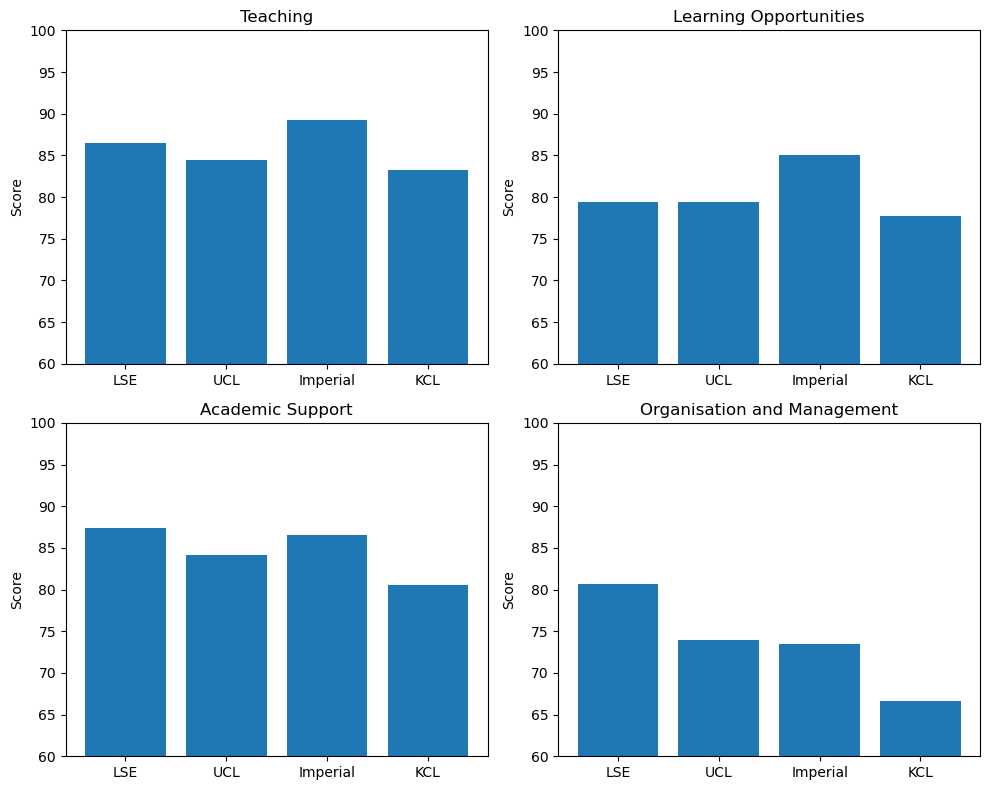

In [63]:
# Define the categories you want to visualize
categories = ['Teaching', 'Learning Opportunities', 'Academic Support', 'Organisation and Management']

# Create a 2x2 matrix of subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Flatten the axis array for easy iteration
axs = axs.flatten()

# Iterate over categories and plot each one
for i, category in enumerate(categories):
    ax = axs[i]
    ax.bar(london_df.index, london_df[category])
    ax.set_title(category)
    ax.set_ylabel('Score')
    ax.set_ylim(60, 100)  # Set y-axis limits from 60 to 100

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


Finally, we look at the 'overall' rankings for universities, though this should be taken with a grain of salt, as many may feel certain qualities, such as 'Teaching' are much more important than Academic Support, for example, and so should be more heavily weighted.

In [65]:
graph_df['Score'] = graph_df[['Teaching', 'Learning Opportunities', 'Academic Support', 'Organisation and Management']].sum(axis=1)
graph_df = graph_df.rename(columns={'index': 'University'})
print(graph_df[['University', 'Score']].sort_values(by='Score', ascending=False).to_string(index=False))

 University  Score
    Glasgow  392.4
Strathclyde  370.5
   Imperial  334.5
        LSE  334.0
     Oxford  333.2
    Warwick  322.6
        UCL  321.9
    Norwich  317.8
 Birmingham  317.2
  Edinburgh  311.1
 Manchester  310.1
        KCL  308.2


As you can, LSE overall ranks comparatively well compared to the other universities. Out of the twelve in total, only three universities scored higher than LSE: Glasgow, Strathclyde and Imperial. 

It is worth noting there may be a correlation between student satisfaction and location; the two highest-scoring universities were in Scotland. There may also be a slight north-south divide within England- the southern universities all scored higher than the northern or midlands universities. However, the sample size is small and only four factors out of seven are being considered.

The stacked bar chart indicated minimal variation between measures as there does not seem to be any outliers between measures at the same university. This suggests that the survey results were consistent; if a university did well in one measure, they tended to do well on the others.

### How does LSE student satisfaction compare to other universities? (Using Reddit Data)

Firstly, we shall view the summary statistics for the sentiment scores for each of the four universities to be compared.

In [286]:
kings_sentiment_cleaned_comb.describe()

count    56.000000
mean      0.111607
std       0.484016
min      -0.800000
25%       0.000000
50%       0.050000
75%       0.500000
max       1.000000
dtype: float64

In [287]:
ucl_sentiment_cleaned_comb.describe()

count    60.000000
mean     -0.020000
std       0.511164
min      -0.900000
25%      -0.500000
50%       0.000000
75%       0.400000
max       0.800000
dtype: float64

In [288]:
imperial_sentiment_cleaned_comb.describe()

count    58.000000
mean      0.012069
std       0.519135
min      -0.900000
25%      -0.575000
50%       0.100000
75%       0.400000
max       1.000000
dtype: float64

In [289]:
lse_sentiment_cleaned_comb.describe()

count    58.000000
mean     -0.058621
std       0.489910
min      -0.900000
25%      -0.500000
50%       0.000000
75%       0.200000
max       1.000000
dtype: float64

The above summary statistics show that LSE has the worst sentiment score at -0.0586, the slightly better average is held by UCL at -0.02, then Imperial has an average score at 0.012, whilst Kings has the best sentiment score by a fair margin at 0.111.

The sample size for the unis are either 58 or 60 titles/comments, so that is relatively fair, whilst the small sample size could represent the true population statistics inaccurately, it would be too difficult and time-consuming to increase the sample size by more.

Furthermore, the standard deviations of all four universities are within the range of 0.48-0.53, so their standard deviations are all fairly similar.

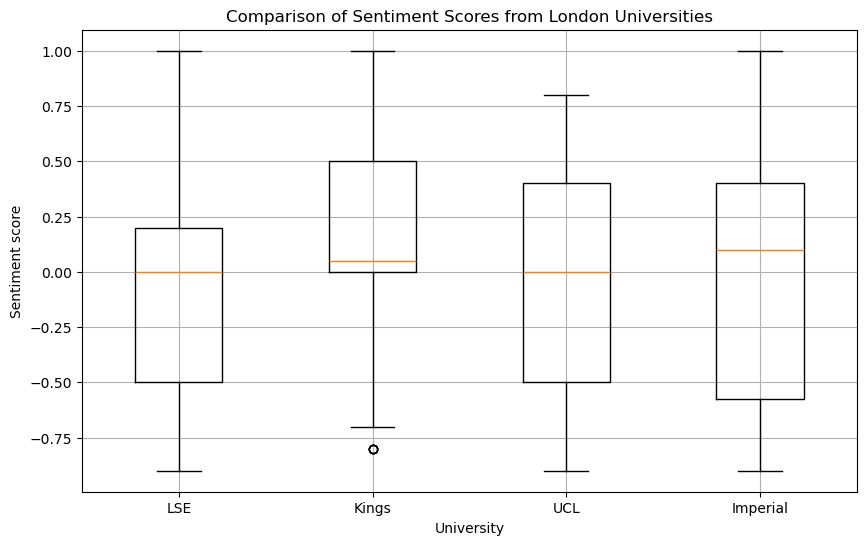

In [290]:
plt.figure(figsize=(10, 6))
plt.boxplot([lse_sentiment_cleaned_comb, kings_sentiment_cleaned_comb, ucl_sentiment_cleaned_comb, imperial_sentiment_cleaned_comb], labels=['LSE', 'Kings', 'UCL', 'Imperial'])
plt.title('Comparison of Sentiment Scores from London Universities')
plt.xlabel('University')
plt.ylabel('Sentiment score')
plt.grid(True)
plt.show()

The above box plots give a better visualisation of the distributions for each universitie's sentiment scores, it shows that King's scores are typically between 0 and 0.5, with 50% of values being within that range, Kings also has the smallest interquartile range, as can be seen from the graph, UCL and Imperial have the largest IQRs with a relatively equal part negative and positive scores, whilst LSE's third quartile is far lower than the others, sitting at 0.2, compared to the next lowest 0.4 of UCL and Imperial.

Showing again, that LSE has receives considerably worse negative comments online than UCL and Imperial, with little very positive comments, whilst Kings experiences the opposite, with more positive comments, and little negative comments at all, no comments even being rated as -1 (the most negative score possible).

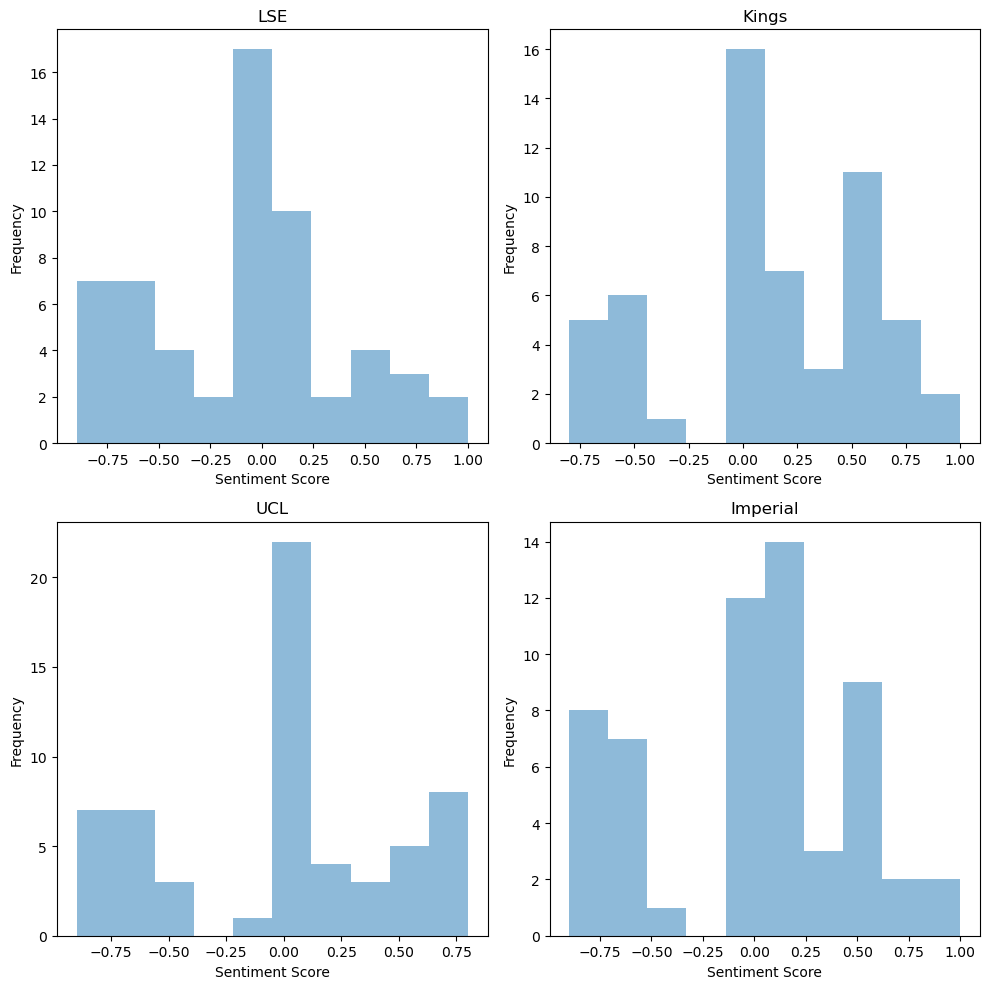

In [303]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0, 0].hist(lse_sentiment_cleaned_comb, bins=10, alpha=0.5)
axs[0, 0].set_title('LSE')
axs[0, 0].set_xlabel('Sentiment Score')
axs[0, 0].set_ylabel('Frequency')

axs[0, 1].hist(kings_sentiment_cleaned_comb, bins=10, alpha=0.5)
axs[0, 1].set_title('Kings')
axs[0, 1].set_xlabel('Sentiment Score')
axs[0, 1].set_ylabel('Frequency')


axs[1, 0].hist(ucl_sentiment_cleaned_comb, bins=10, alpha=0.5)
axs[1, 0].set_title('UCL')
axs[1, 0].set_xlabel('Sentiment Score')
axs[1, 0].set_ylabel('Frequency')

axs[1, 1].hist(imperial_sentiment_cleaned_comb, bins=10, alpha=0.5)
axs[1, 1].set_title('Imperial')
axs[1, 1].set_xlabel('Sentiment Score')
axs[1, 1].set_ylabel('Frequency')

plt.tight_layout()

plt.show()

The above histograms furhter represent the lack of positive (>0.25) scores for LSE, the graphs indicate that Imperial experiences a lot of very negative comments, more than LSE actually, but LSE experiences more negative comments overall, hence bringing the average down by more. 

Furthermore, the above graphs show that a large proportion of the comments are neutral (0), showing that many of the reddit comments were either neutral about the universities (unlikely) or more realistically, they didn't provide much information relevant to student satisfaction regarding that university, which could have reduced the number of useful comments for this data analysis, thus potentially misrepresenting the population,

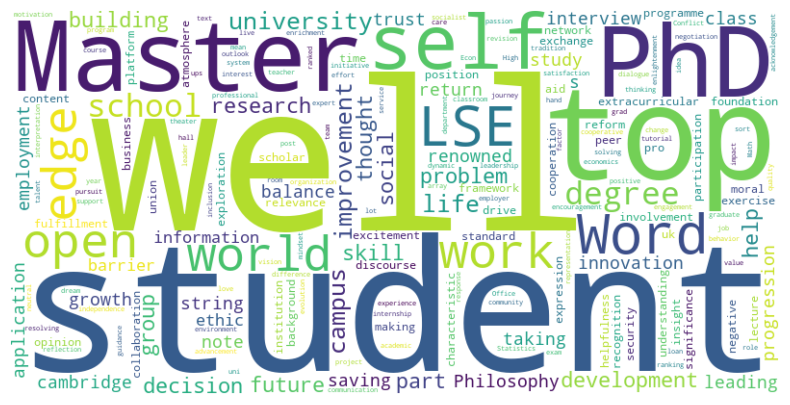

In [292]:
plt.figure(figsize=(10, 5))
plt.imshow(lse_word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

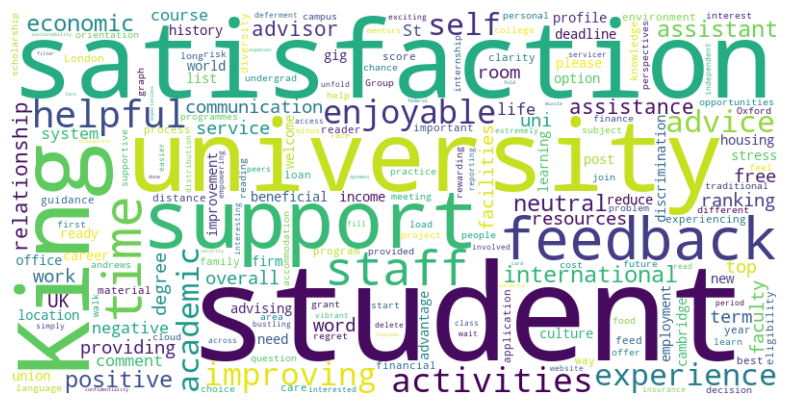

In [293]:
plt.figure(figsize=(10, 5))
plt.imshow(kings_word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

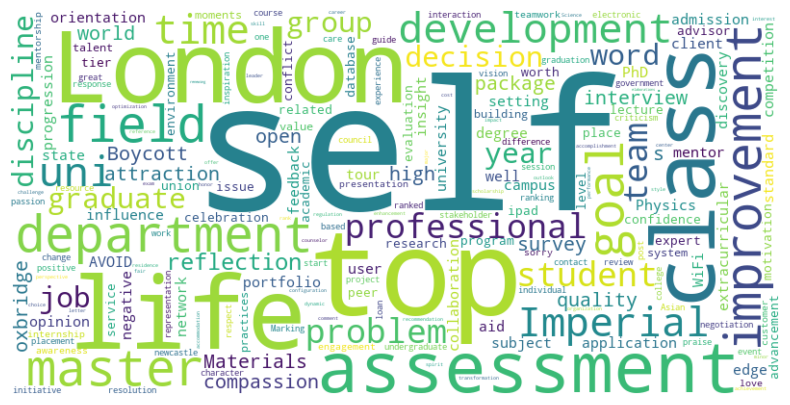

In [294]:
plt.figure(figsize=(10, 5))
plt.imshow(imperial_word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

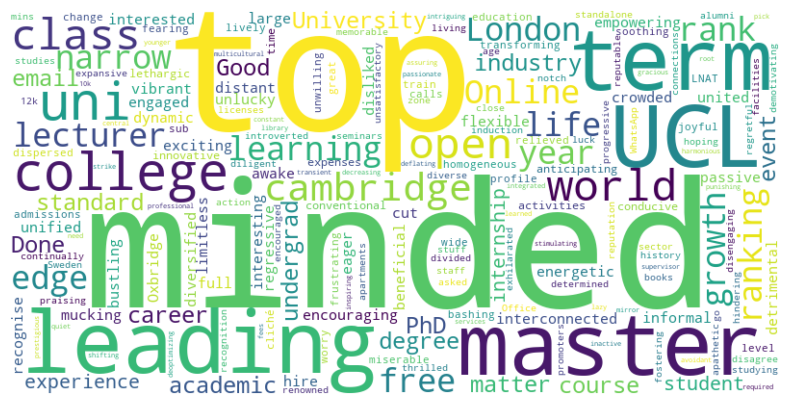

In [295]:
plt.figure(figsize=(10, 5))
plt.imshow(ucl_word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

The above word clouds don't provide much insight into the data, however there are some interesting insights.

Firstly, King's word cloud is the only one to have 'Support', 'Satisfaction', and 'feedback' which supports the data from the word cloud suggesting that Kings excels here in comparison to the other London universities compared to, whilst Imperial's contains 'professional', 'improvement', and 'assessment' potentially indicating a tougher work-life balance and a more career-driven experience, whilst UCL contains 'master', and 'leading' which doesn't provide much information, whilst LSE contains 'masters', 'PhD' showing that LSE may be looked at for postgraduate studies more than these other universities.

### How does student satisfaction in LSE vary by degree?

Once again, let's remind ourselves of the Dataframe we created to answer this question.

In [115]:
overall_subjectdf

,Teaching,Learning Opportunities,Assessment and Feedback,Academic Support,Organisation and Management,Learning Resources,Student Voice,Response Ratio
Psychology,99.2,96.0,89.3,100.0,96.7,93.9,100.0,1.00
Mathematical sciences,72.8,69.3,58.6,76.9,70.8,84.6,59.6,0.63
"Sociology, social policy and anthropology",90.1,82.6,77.5,89.8,80.9,89.8,72.9,0.71
Economics,84.1,75.7,68.2,86.5,81.9,85.4,64.4,0.65
Politics,89.2,79.3,69.2,87.9,78.2,88.4,63.6,0.73
Law,93.3,82.3,79.5,90.0,76.7,87.7,67.5,0.59
Business and management,88.0,82.7,70.3,88.0,85.6,86.8,69.6,0.66
Languages and area studies,93.3,89.8,92.4,100.0,84.5,86.0,75.6,0.77
History and archaeology,90.3,84.6,78.1,91.2,85.6,88.5,71.4,0.74
Philosophy and religious studies,90.4,83.9,79.1,93.1,83.8,88.3,73.8,0.68


Once again, let's use a stacked bar chart to visualise this.

Factors that we decided to consider from the above dataframe based on relevance to the question: Teaching, Learning Opportunities, Academic Support, Organisational Management.

Each bar also includes data on standard deviation, response ratio and number of respondants for each measure.

In [116]:
teach_df = teach_df.reset_index()
learn_df = learn_df.reset_index()
support_df = support_df.reset_index()
organisation_df = organisation_df.reset_index()

In [117]:
merged_df = overall_subjectdf.copy()
merged_df = merged_df.reset_index()

#merge the standard deviation in individual data frames to overall_subject.df on Subject 'index'
merged_df = merged_df.merge(teach_df[['index', 'Standard Deviation']],on='index',how='left',).rename(columns={'Standard Deviation': 'Teaching Std Dev'})
merged_df = merged_df.merge(learn_df[['index', 'Standard Deviation']],on='index',how='left',).rename(columns={'Standard Deviation': 'Learning Std Dev'})
merged_df = merged_df.merge(support_df[['index', 'Standard Deviation']],on='index',how='left',).rename(columns={'Standard Deviation': 'Support Std Dev'})
merged_df = merged_df.merge(organisation_df[['index', 'Standard Deviation']],on='index',how='left',).rename(columns={'Standard Deviation': 'Organisation Std Dev'})

#create hover text for standard deviation and response ratio
merged_df['Teaching_hovertext'] = merged_df.apply(lambda row: f'Standard Deviation: {row["Teaching Std Dev"]:.2f}<br>'f'Response Ratio: {row["Response Ratio"]:.2f}',axis=1)
merged_df['Learning_hovertext'] = merged_df.apply(lambda row: f'Standard Deviation: {row["Learning Std Dev"]:.2f}<br>'f'Response Ratio: {row["Response Ratio"]:.2f}',axis=1)
merged_df['Support_hovertext'] = merged_df.apply(lambda row: f'Standard Deviation: {row["Support Std Dev"]:.2f}<br>'f'Response Ratio: {row["Response Ratio"]:.2f}',axis=1)
merged_df['Organisation_hovertext'] = merged_df.apply(lambda row: f'Standard Deviation: {row["Organisation Std Dev"]:.2f}<br>'f'Response Ratio: {row["Response Ratio"]:.2f}',axis=1)

#create the figure
fig = go.Figure()

#add bar traces for each measure
fig.add_trace(go.Bar(x=merged_df['index'],y=merged_df['Teaching'],name='Teaching',hovertext=merged_df['Teaching_hovertext'],hoverinfo='text',))
fig.add_trace(go.Bar(x=merged_df['index'],y=merged_df['Learning Opportunities'],name='Learning Opportunities',hovertext=merged_df['Learning_hovertext'],hoverinfo='text',))
fig.add_trace(go.Bar(x=merged_df['index'],y=merged_df['Academic Support'],name='Academic Support',hovertext=merged_df['Support_hovertext'],hoverinfo='text'))
fig.add_trace(go.Bar(x=merged_df['index'],y=merged_df['Organisation and Management'],name='Organisation and Management',hovertext=merged_df['Organisation_hovertext'],hoverinfo='text',))

#update the layout
fig.update_layout(
    barmode='stack',
    title='Student satisfaction at LSE by degree subject',
    xaxis_title='Subject',
    yaxis_title='Score, 0-100 per measure',
)

#show the figure
fig.show()

The bar chart shows that Psychology has significantly higher student satisfaction within LSE than any other subject, recieving an overall score of 391.09/400 in the four measures we considered. All other departments had a score of above 75% except for 'Mathematical sciences' which scored slightly below with 72.45%.

One limitation to this information is the standard deviation, since the two highest subjects also had the highest average standard deviation, with 5.80 and 12.03 respectively. This suggests that the scores are slightly less accurate and that many students in these subjects have a worse student satisfaction result than quoted. The standard deviation in other subjects remained realtively consistent, with a range of 2.20 and 5.63.

Furthermore, the two highest subjects also had the two highest response ratios. This could mean one of two things. Either the higher the response ratio, the more accurate the measure and the higher the student satisfaction tends to be. Or, the sample size was too small and the measure is providing an unusually positive student satisfaction result.

### How has student satisfaction at the LSE changed over time?

Below, is the years_df we will use to answer this question.

In [119]:
years_df

,2015,2016,2017,2018,2019,2020,2021,2022,2023
Teaching,82.3,81.5,77.4,74.6,80.1,84.6,82.3,83.5,86.5
Learning Opportunities,70.4,64.3,71.2,68.4,74.6,78.0,75.8,79.1,79.4
Assessment and Feedback,70.0,62.7,61.8,61.6,69.3,72.2,68.2,69.7,71.1
Academic Support,77.4,63.9,65.3,66.5,71.0,76.3,74.1,75.5,87.4
Organisation and Management,86.4,83.5,73.4,73.9,78.0,82.9,77.1,78.2,80.7
Learning Resources,72.8,67.6,80.3,75.3,79.4,85.3,79.1,83.2,87.1


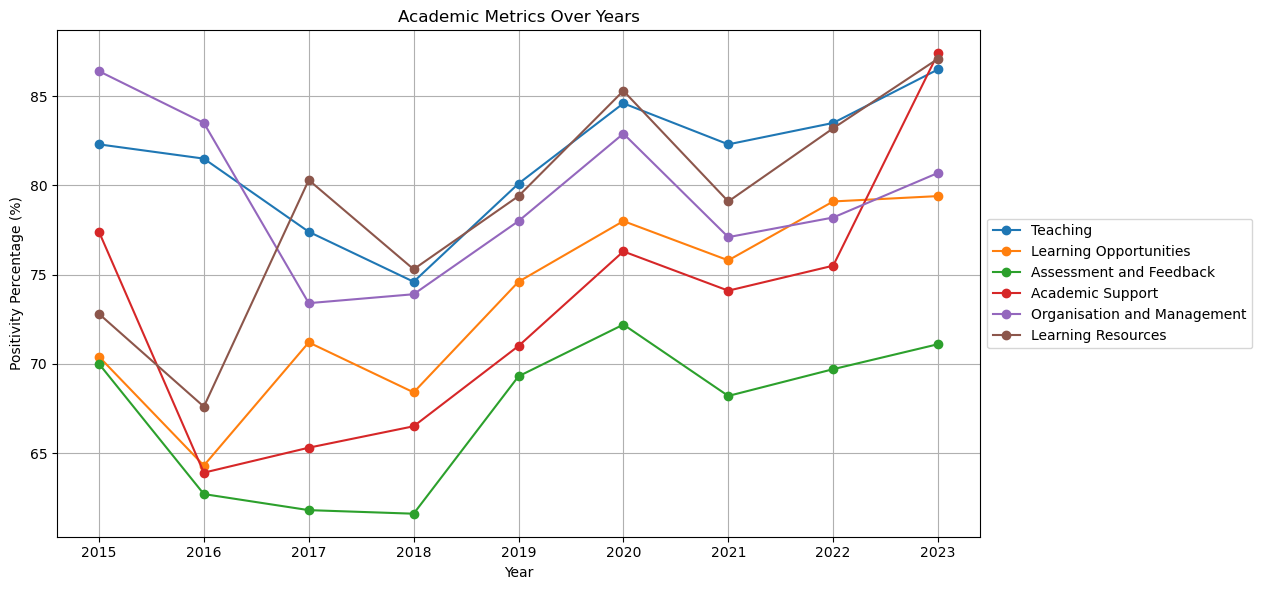

In [120]:
transposed_df = years_df.transpose()

# Plot
plt.figure(figsize=(10, 6))
for column in transposed_df.columns:
    plt.plot(transposed_df.index, transposed_df[column], marker='o', label=column)

plt.title('Academic Metrics Over Years')
plt.xlabel('Year')
plt.ylabel('Positivity Percentage (%)')
plt.grid(True)
plt.tight_layout()

# Display the legend separately
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

Though it seems clear that student satisfaction has been rising over the years in most categories (also remember, that the questions for 2023 had a slightly different format), we  want to get a better idea of the general trend by plotting a line of best fit for each category. Also, since we are dealing with percentages it seems a bit unwise to use this to predict the future years student satisfaction scores. 

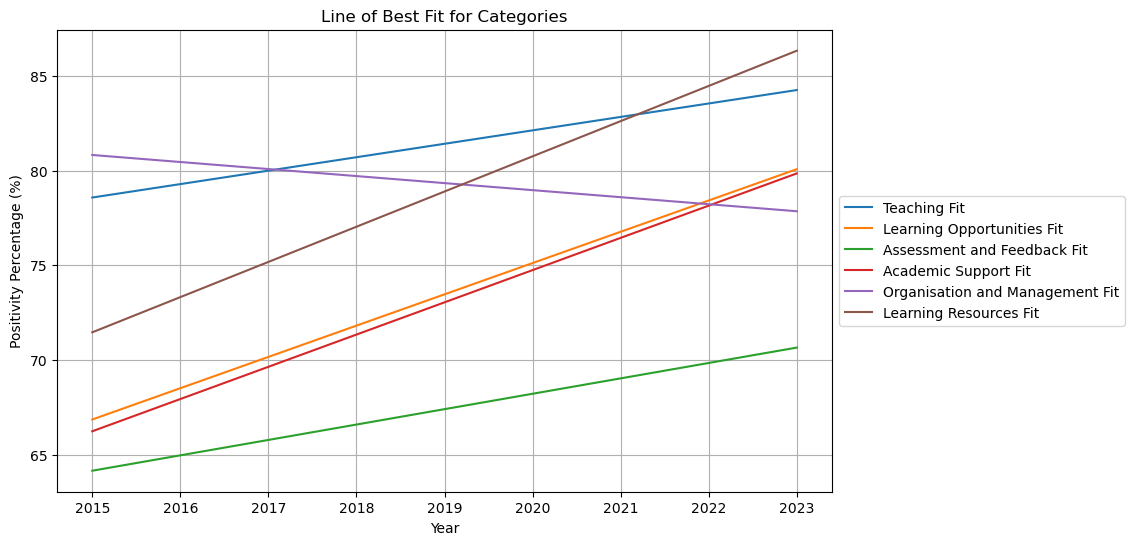

In [121]:
years = years_df.columns.astype(int).values

# Initialize a plot
plt.figure(figsize=(10, 6))

# Loop through each category
for category in years_df.index:
    # Extract the data for the current category
    category_data = years_df.loc[category].values
    
    # Perform linear regression
    slope, intercept, _, _, _ = linregress(years, category_data)
    
    # Predict values for all years using the regression line
    predicted_values = slope * years + intercept
    
    
    # Plot the line of best fit
    plt.plot(years, predicted_values, label=f'{category} Fit')

plt.xlabel('Year')
plt.ylabel('Positivity Percentage (%)')
plt.title('Line of Best Fit for Categories')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.show()

So, it seems as if student satisfaction is rising in most categories, though there are huge fluctuations year to year and so the future is uncertain. The plots also show interesting details, like the fact that through all of the years LSE students are least happy with 'Assessment and Feedback' topic.

# Conclusion

Let's remind ourselves of the initial research questions

1) How does LSE student satisfaction compare to other universities? 
2) How is LSE perceived by people online? How does it compare with other universities's perceptions online?
3) How does student satisfaction within LSE vary by degree?
4) How has LSE student satisfaction evolved over time (2015-2023)?


For Question 1, the analysis indicates that LSE ranks comparatively well compared to universities in the Northern and Midlands regions of England,  on-par with other universities in the South of England, and worse than universities in Scotland. However, specifically within London, our results suggest that LSE has one of the best student satisfaction (though we did only look at four London universities, and excluded, for example, Queen Mary's University London).

However, when turning to how LSE is viewed online, our analysis of the Reddit comments has showed us that it is generally reviewed negatively, as it has the lowest mean sentiment score, lower than its London counterparts of Kings, UCL, and Imperial, with Kings being rated the highest by a decent margin, with Imperial following. This is supported by the histograms, and word clouds, both indicating that LSE receives few very positive student satisfaction ratings online. Surprisingly, this is contrary to our earlier findings of LSE's academic metrics generally being better than Kings in the NSS.

We should consider some of the limitations with our Reddit Data Analysis though:
- Small sample size, for ease of convenience and to save time, a sample of only around 60 titles/comments for each university was collected, potentially misrepresenting the true population statistics
- As the data is collected online, from Reddit, it can be unreliable, as people can easily lie online, and the type of people who may use Reddit, may be users who are typically more negative or possess similar opinions, potentially skewing the results

For Question 3, we conclude that there is significant variation between degrees, with Psychology and 'Languages and area studies' having the highest satisfaction and 'Mathematical sciences' having the lowest. Additionally, in our earlier exploration section we found that more Quantitative subjects generally had lower student satisfaction scores in general .However, since the response rate is not uniform across all subjects and specifically lower for more quantitative subjects, it is difficult to fairly compare each subject in terms of verifiability.

Finally, LSE student satisfaction does seem to be on an upward trajectory. Our visualisation and line of best fit showed the general trend was rising student satisfaction in all metrics, however, there has been huge fluctuations year to year so the future is still uncertain.
